# Анализ данных интернет-магазина по продаже компьютерных игр  

**Описание проекта:**  

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  

**Цель проекта:**  

Для планирования рекламных кампаний необходимо выявить закономерности, определяющие успешность игры и определить потенциально популярный продукт.  

**Описание данных:**  

- `name` — название игры
- `platform` — платформа
- `year_of_release` — год выпуска
- `genre` — жанр игры
- `nA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)
- `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

PS... Данные за 2016 год могут быть неполными.  

**План исследования:**  
- выгрузка и предобработка данных
- исследовательский анализ данных
- портрет пользователя для каждого региона
- проверка гипотез
- выводы и рекомендации

## Шаг 1. Выгрузка и предобработка данных

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats as st
#from scipy.stats import binom, norm 
#from math import sqrt

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# загружаем данные:

try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv(r'C:\Users\ANDREY\Documents\datasets\games.csv', sep = ',')

In [3]:
# функция для вывода необходимых характеристик датафрейма

def data_info(data):
    print(f'\033[1;30m количество строк: \033[0m {data.shape[0]} \n \
          \n\033[1;30m количество столбцов: \033[0m {data.shape[1]}\n')
    print('\033[1;30m информация о датафрейме: \033[0m\n')
    data.info()
    print('\n\033[1;30m первые пять строк датафрейма: \033[0m')
    display(data.head())
    print('\n\033[1;30m количество пропусков в столбцах: \033[0m')
    display(data.isna().sum().sort_values())
    print('\n\033[1;30m количество явных дубликатов: \033[0m', data.duplicated().sum())
    print('\n\033[1;4;30m описание числовых столбцов: \033[0m')
    display(data.describe())

In [4]:
print('\n\033[7;30m таблица: games \033[0m\n')
data_info(games)


 таблица: games 

 количество строк:  16715 
           
 количество столбцов:  11

 информация о датафрейме: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

 первые пять строк датафрейма: 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



 количество пропусков в столбцах: 


Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64


 количество явных дубликатов:  0

 описание числовых столбцов: 


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- В наших данных более 16.7 тыс. строк и 11 столбцов. 
- Видим что имеются пропуски, при чем в столбцах с оценкой критиков/пользователей и с рейтингом их количество составляет 40-50% от всего датафрейма. 
- Тип данных не везде указан верно, необходимо заменить тип в столбце `Year_of_Release на int` и в столбце `User_Score на float`. 
- Также необходимо привести к нижнему регистру названия столбцов. 
- Явные дубликаты отсутствуют. 
- Согласно описанию числовых столбцов:
  - данные об играх представлены с 1980 по 2016 год
  - средние и медианные значения продаж по странам достаточно отличаются друг от друга, что вероятно говорит нам о наличии выбивающихся значений (что подтверждается высокими значениями максимального количества продаж).
  - средние значения продаж по странам - самый высокий показатель у Северной Америки (0.26 млн. копий), далее идут продажи в Европе (0.15 млн. копий) и в Японии (0.08 млн. копий). 
  - оценка критиков распределена более равномерно - по 100-бальной шкале, минимальное значение 13, максимальное 98, среднее и медианное практически на одном уровне (69 и 71 соответственно), 75% игр получили от критиков оценку до 79 баллов.
  - оценка пользователей в описании не представлена, т.к. имеет тип данных object, далее, после изменения типа, отдельно рассмотрим описание данного столбца.  

Первым делом приведем названия столбцов к нижнему регистру и далее рассмотрим уникальные значения в столбцах.

In [5]:
games.columns = games.columns.str.lower()

In [6]:
for columns in games[['platform', 'genre', 'year_of_release', 'critic_score', 'user_score', 'rating']]:
    print(f'\nуникальные значения в столбце \033[1;4;30m{columns}\033[0m\n',games[columns].unique())


уникальные значения в столбце platform
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

уникальные значения в столбце genre
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

уникальные значения в столбце year_of_release
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

уникальные значения в столбце critic_score
 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39.

Кроме столбца platform во всех имеются значения nan, что говорит о пропущенных значениях, также в столбце user_score мы видим значение `tbd`. "tbd происходит от английской фразы «to be determined», что означает «подлежит определению» или «будет уточнено». Эта аббревиатура используется для обозначения информации, которую пока не удается определить или конкретизировать.
Источник: https://uralchip.ru/faq/znacenie-abbreviatury-tbd-i-ee-rassifrovka". Для дальнейшего удобства при расчетах заменим данное значение на nan.

In [7]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

Согласно официальному сайту ESRB (Entertainment Software Rating Board) на данный момент существуют следующие категории рейтингов:
- E (everyone) - контент подходит для всех возрастов
- E10+ (everyone 10+) - контент подходит для возрастов от 10 и старше
- T (teen) - контент подходит для возрастов от 13 и старше
- M (Mature 17+) - контент подходит для возрастов от 17 и старше
- AO (adults only 18+) - контент подходит для возрастов от 18 и старше
- RP - окончательный рейтинг еще не присвоен
- RP likely mature 17+ - окончательный рейтинг еще не присвоен, но ожидается, что ему будет присвоен рейтинг зрелости 17+.  

У нас же имеются такие рейтинги как `K-A` и `EC`. Согласно информации из открытых источников, рейтинг `K-A` (for Kids to Adults) использовался до 1998 года, после он был переименован в `E` (everyone) (This rating was used until the year 1998 when it renamed to E. Источник: https://boardgamegeek.com/videogamerating/2220/esrb-k), рейтинг `EC` (for Early Childhood) также был переименован в рейтинг `E` в 1998 году. ( Games with this rating, as the title implies, appeals to children and adults. This rating was used from 1994 to 1998 before it was replaced with the Everyone (E) rating. Источник: https://www.addresources.org/c/questions/what-games-are-rated-ec). Заменим данные два рейтинга на рейтинг `E`.  

In [8]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'EC', 'rating'] = 'E'

In [9]:
games['rating'].value_counts()

E       4001
T       2961
M       1563
E10+    1420
RP         3
AO         1
Name: rating, dtype: int64

In [10]:
games.query('rating == "RP" or rating == "AO"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.00,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.0,0.00,65.0,NaN,RP


Рейтинги RP (rating pending) и AO (adults only) занимают совсем незначительную часть. На официальном сайте ESRB у игры Grand Theft Auto: San Andreas присвоен рейтинг M (mature) (https://www.esrb.org/ratings/38176/grand-theft-auto-san-andreas-the-definitive-edition/), у игры Supreme Ruler: Cold War	присвоен рейтинг E10+ (everyone 10+) (https://www.esrb.org/search/?searchKeyword=Supreme+Ruler%3A+Cold+War%09). Заменим рейтинги для строк 875 и 14270 (строки под номерами 13672 и 16180 в последующем будут удалены, т.к. отсутствуют данные о годах релиза игры).

In [11]:
games.loc[875, 'rating'] = 'M'
games.loc[14270, 'rating'] = 'E10+'

Далее рассмотрим пропущенные значения.

In [12]:
# пропуски в названии игры

games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Помимо названия игры, также отсутствуют данные о жанре. К сожелению из открытых источников не получилось выявить что это за игры, т.к. много информации отсутствует. В данном случае пропуски могли быть связаны с годом выпуска (имея данные об играх вплоть до 2016 года, игры 1993 года можно считать устаревшими) или же причиной пропуска мог стать челевеческий фактор, либо технический сбой при работе с информацией. Пропуски составляют 0.01% данных, будет целесообразно их удалить.

In [13]:
games = games.dropna(subset=['name'])

In [14]:
# пропуски в годах выпуска игр

games.query('year_of_release.isnull()') #.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 строк с пропущенными данными о годе релиза игры, что составляет 1.6 % от всего датафрейма. Выборочно посмотрим на некоторые игры, возможно есть строки с указанием года выпуска.

In [15]:
games.query('name == "Space Invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [16]:
games.query('name == "Rock Band"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [17]:
games.query('name == "PDC World Championship Darts 2008"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,NaN,E10+


Есть игры с совпадающими названиями и указанной датой релиза, но все игры представлены на разных платформах, либо указаны разные года релиза, где-то и вовсе год отсутствует. Можно было бы вывести средний/медианный год релиза для игры по платформам или же использовать максимальный год релиза, но эти данные были бы недостоверными и т.к. в последующем мы будем проводить ислледование по более "свежим" данным и отсекать неактуальные года, принимаем решение удалить данные строки с пропуском года.

In [18]:
games = games.dropna(subset=['year_of_release'])

In [19]:
# пропуски в рейтингах игр

games.query('rating.isnull()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15646,Nil Admirari no Tenbin: Teito Genwaku Toukidan,PSV,2016.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
328,Mario & Luigi: Bowser's Inside Story,DS,2009.0,Role-Playing,2.23,0.47,0.81,0.26,NaN,NaN,NaN
13800,Rally Challenge 2000,N64,1999.0,Racing,0.03,0.01,0.00,0.00,NaN,NaN,NaN
4014,Euro Truck Simulator,PC,2008.0,Simulation,0.00,0.42,0.00,0.07,NaN,7.6,NaN
3255,Bahamut Lagoon,SNES,1996.0,Role-Playing,0.00,0.00,0.62,0.00,NaN,NaN,NaN
14536,Zoboomafoo: Leapin' Lemurs!,PS,2001.0,Action,0.02,0.01,0.00,0.00,NaN,NaN,NaN
1601,Road Rash 3D,PS,1998.0,Racing,1.05,0.16,0.00,0.04,NaN,NaN,NaN
11280,Beat Sketch!,PS3,2010.0,Misc,0.00,0.00,0.08,0.00,NaN,NaN,NaN
1307,New Play Control! Mario Power Tennis,Wii,2009.0,Sports,0.35,0.69,0.28,0.14,NaN,NaN,NaN
16231,Umineko no Naku Koro ni Portable 1,PSP,2011.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Также выборочно проверим некоторые игры на возможное наличие рейтинга.

In [20]:
games.query('name == "Dishonored"')[['name', 'rating']]

,name,rating
1041,Dishonored,M
1224,Dishonored,M
3919,Dishonored,NaN
4886,Dishonored,NaN
8880,Dishonored,NaN


In [21]:
games.query('name == "LEGO Star Wars: The Video Game"')[['name', 'rating']]

,name,rating
367,LEGO Star Wars: The Video Game,NaN
1363,LEGO Star Wars: The Video Game,NaN
1755,LEGO Star Wars: The Video Game,NaN
1793,LEGO Star Wars: The Video Game,NaN
15904,LEGO Star Wars: The Video Game,NaN


В данном случае мы видим, что у некоторых игр имеются непропущенные значения, но т.к. у разных платформ может быть разный рейтинг заполним все пропуски значением `unknown`

In [22]:
games['rating'] = games['rating'].fillna('unknown') 

In [23]:
# пропуски в оценке пользователей

games.query('user_score.isnull()') #.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


In [24]:
# пропуски в оценке критиков

games.query('critic_score.isnull()') #.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Заметим что пропуски в оценке критиков сопровождаются пропусками и в оценке пользователей и в рейтинге. Можно предположить, что это более похоже на технический сбой при заполнении или выгрузке информации. Конечно, в данном случае удалить строки с пропусками мы не можем, т.к. они содержат более 50% данных, оставим без изменений.  

Далее приведем столбцы к корректному типу данных и проверим данные на наличие неявных дубликатов.

In [25]:
games = games.astype({'year_of_release':'int','user_score':'float'})

In [26]:
# посчитаем количество неявных дубликатов

games[['name', 'platform']].duplicated().sum()

3

In [27]:
games[games[['name', 'platform']].duplicated(keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Из открытых источников удалось выяснить что игра <ins>Need for Speed: Most Wanted</ins> выпускалась и 2005 и в 2012 годах для обеих платформ, оставим данные без изменений. Строки 604 и 16230 явные дубликаты, удалим строку 16230, т.к. в ней дублируются значения и она содержит меньше информации.

In [28]:
games = games.drop(index = 16230) 

Теперь, когда изменили тип данных столбца с оценкой пользователей, можно рассмотреть его характеристики.

In [29]:
games['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Всего почти 7.5 тыс. строк с данными об оценках пользователей, минимальное значение - 0, максимум - 9.7. Средняя и медиана приблизительно на одном уровне (7.13 и 7.5 соответственно), что говорит о наличии "левого хвоста". 75% игр оценены пользователями до 8.2 баллов.

In [30]:
# посчитаем суммарные продажи по играм

games['global_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)  
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [31]:
# рассмотрим характеристики нового столбца

games['global_sales'].describe()

count    16443.000000
mean         0.536055
std          1.558828
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_sales, dtype: float64

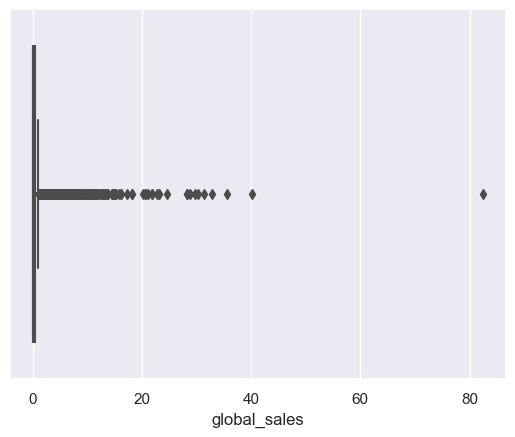

In [32]:
sns.boxplot(x=games['global_sales']);

Очевидно что в данном столбце у нас есть значительные отклонения. Среднее значение равно 0.54 млн. проданных копий, тогда как медианное значение равно 0.17. На графике также видно, что основная масса значений сосредоточена в районе 0-0.2 миллиона копий.  
Рассмотрим минимальные и максимальные значения.

In [33]:
games.query('global_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0


In [34]:
games.query('global_sales > 80')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Две игры с нулевыми продажами по странам содержат мало информации: отсутствуют и оценка пользователей/критиков и рейтинг.  
В разных рейтингах игра Wii Sports действительно входит в топ игр по продажам и наши значения указаны корректно (источник: https://arcadetemple.com/wii-sports-sales-numbers/), но в данном случае это явновыбивающееся значения. Для дальнейшего исследования удалим данные три строчки.

In [35]:
games.shape

(16443, 12)

In [36]:
games = games.query('global_sales != 0 and global_sales < 80')

In [37]:
games.shape

(16440, 12)

In [38]:
# обновим индексы

games = games.reset_index(drop=True)

In [39]:
# проверим информацию о датафрейме

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16440 entries, 0 to 16439
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16440 non-null  object 
 1   platform         16440 non-null  object 
 2   year_of_release  16440 non-null  int32  
 3   genre            16440 non-null  object 
 4   na_sales         16440 non-null  float64
 5   eu_sales         16440 non-null  float64
 6   jp_sales         16440 non-null  float64
 7   other_sales      16440 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           16440 non-null  object 
 11  global_sales     16440 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


**Вывод:**  
- выгрузили и рассмотрели имеющиеся данные
- привели названия столбцов к нижнему регистру
- рассмотрели уникальные значения в столбцах (аббревиатуру tbd в оценке пользователей заменили на nan, актуализировали рейтинги игр, а пропущенные значения рейтингов заменили на unknown)
- удалили пропущенные значения в названиях игр и в столбце жанр (2 строки) и в столбце с годом релиза игры (269 строк)
- привели столбцы к корректному типу данных, где это было необходимо и избавились от неявных дубликатов
- добавили столбец с ссумарными продажами по странам и удалили из него строки с выбивающимися значениями
- пропуски в столбцах с оценкой пользователей и критиков оставили без изменений, т.к. они (пропуски) составляют практически 50% от всего датасета, а возможности подставить корректные значения у нас нет

## Шаг 2. Исследовательский анализ данных  

### Количество игр, выпускаемое по годам

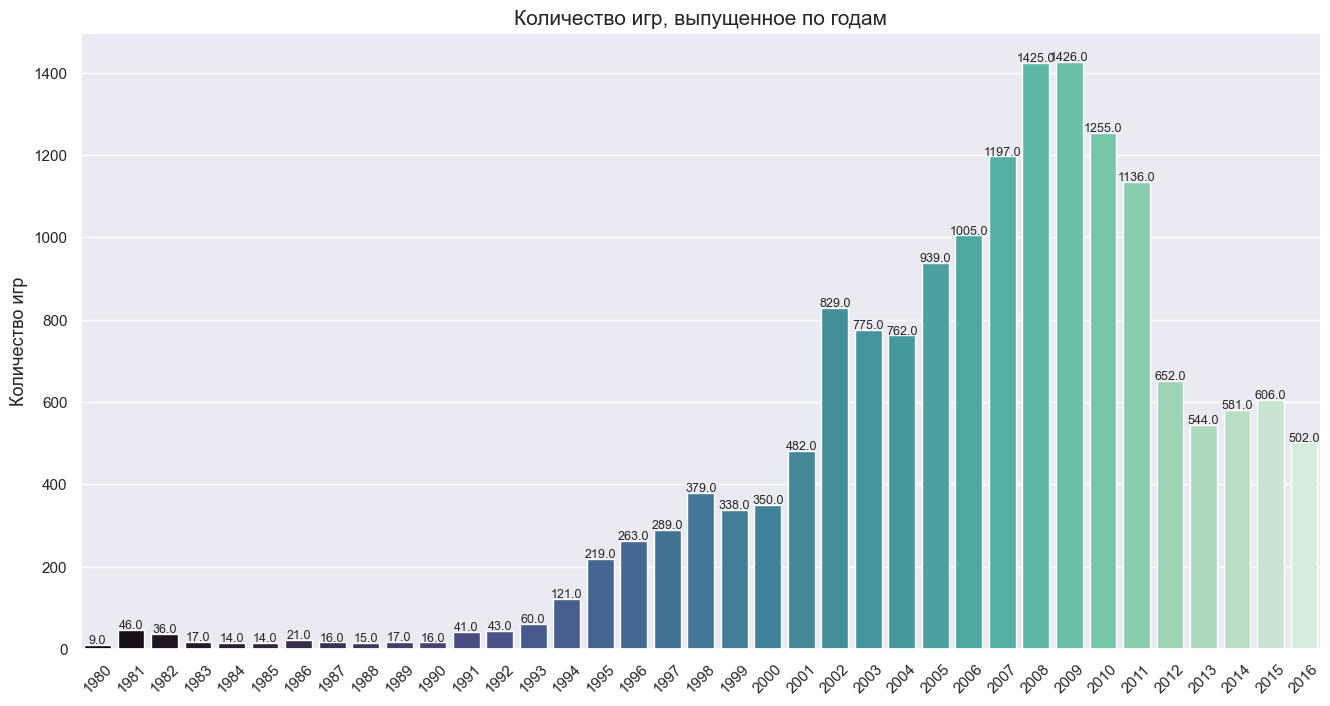

In [40]:
countplt, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'year_of_release', data = games, palette = 'mako')
ax.set_title('Количество игр, выпущенное по годам',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

- Начиная с 1995 года мы видим рост количества релизов по годам (в два раза больше игр по сравнению с предыдущим годом) и далее идет "волнообразная" тенденця к их увеличению вплоть до 2009 года. 
- 2008 и 2009 года стали самыми успешными по количеству выпущенных игр (1425 и 1426 соответственно). После этого периода наблюдается спад и в 2012 году количество релизов значительно сократилось до 652 игр (по сравнению с 2011 годом практически в 2 раза). 
- За последние года 2013-2016 ситуация значительно не менялась - количество ежегодных релизов находились в диапазоне 500-600 игр в год. 
- Как и вся история, развитие индустрии игр подвержено цикличности, за предоставленный временной отрезок мы несколько раз можем наблюдать схожие циклы: рост -> пиковое значение -> снижение. Т.к. изначальный значительный рост мы наблюдаем с 1995 года, данные за предыдущие года считаем неактуальными.  

Посмотрим на продажи по годам.

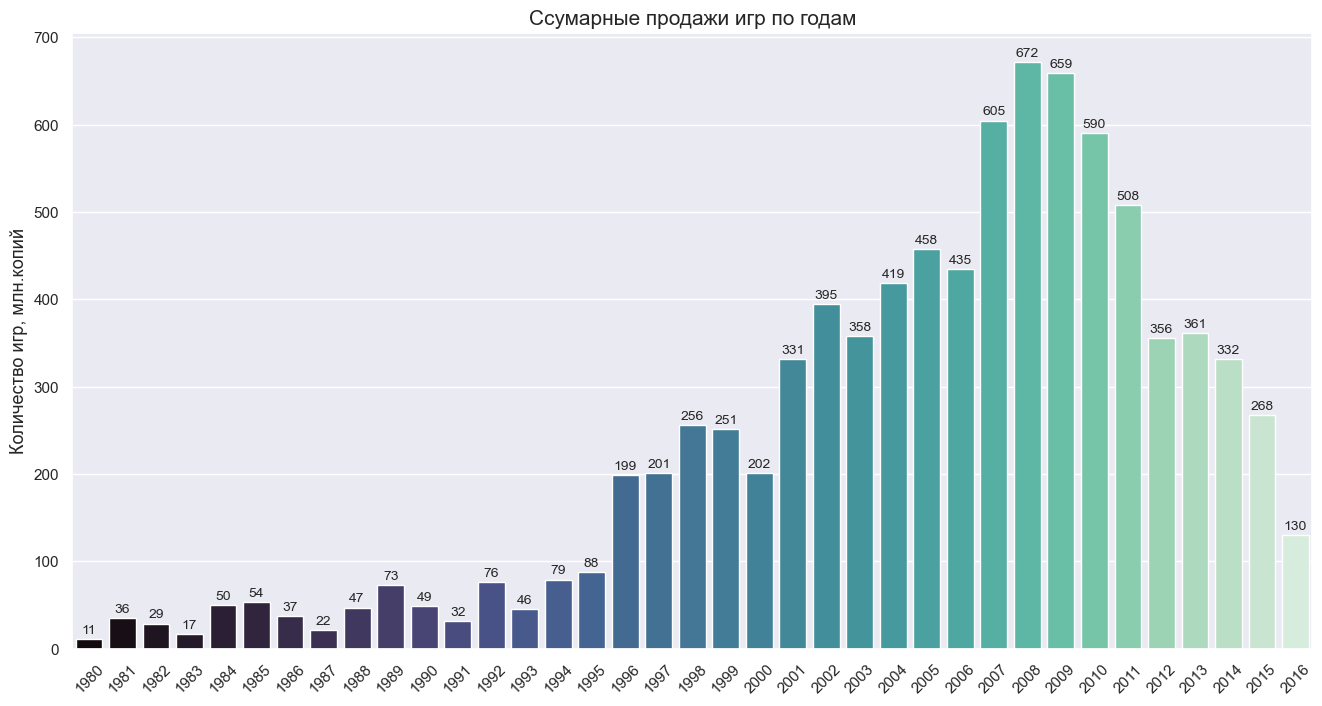

In [41]:
sby = games.groupby('year_of_release').agg({'global_sales':'sum'}).reset_index()
barplot, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'year_of_release', y = 'global_sales', data = sby, palette = 'mako')
ax.set_title('Ссумарные продажи игр по годам',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 13)
rects = ax.patches
labels = [round(sby['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom", fontsize = 10
    )
plt.xticks(rotation = 45)
plt.show()

Визуально графики похожи, значительный рост в продажах начинается с 1996 года. 2008 и 2009 года лидируют по продажам игр (более 650 млн. копий). После 2011 года наблюдается спад вплоть до 2016 года.

### Изменение продаж по платформам  

Сначала посмотрим какое количество игр вышло на каждой платформе за весь представленый период.

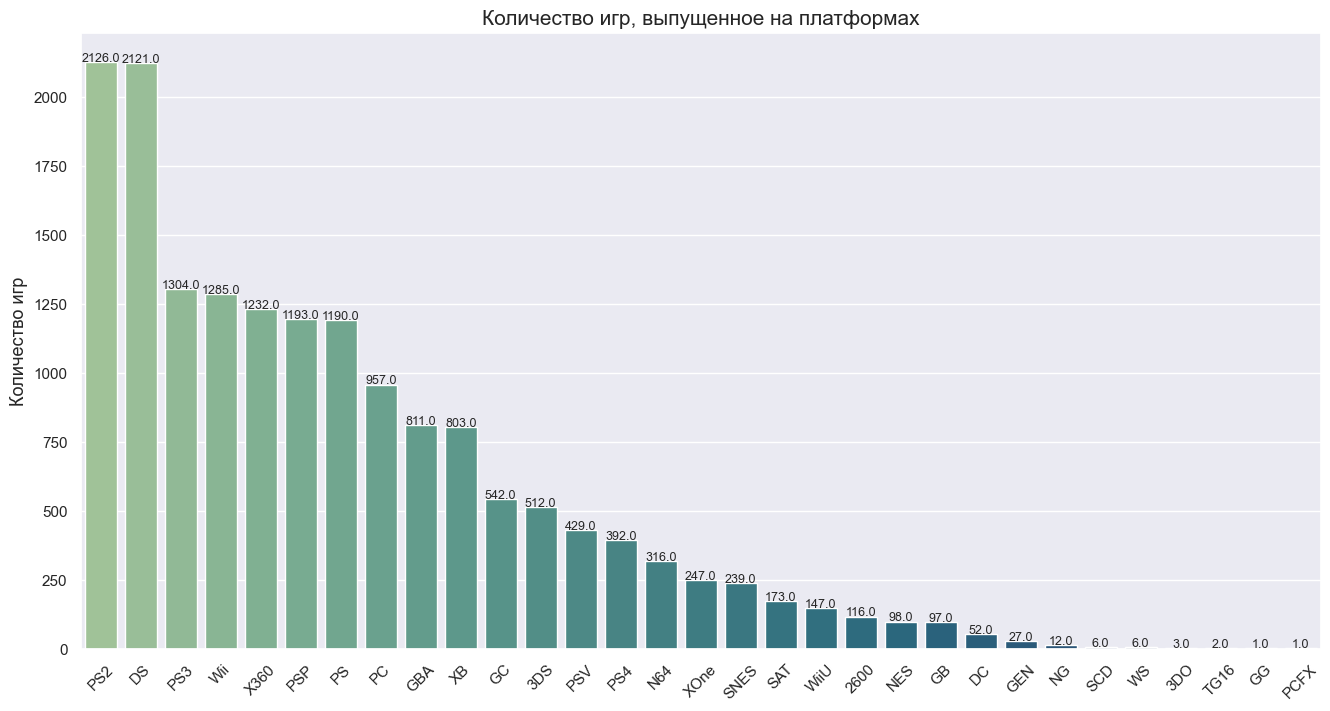

In [42]:
countplt, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'platform', data = games, order = games['platform'].value_counts().index, palette = 'crest')
ax.set_title('Количество игр, выпущенное на платформах',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

Больше всего игр было выпущенно на платформах PS2 и DS (2126 и 2121 соответственно).  
В семерку лидеров также входят платформы PS3 (1304 игр), Wii (1285 игр), Х360 (1232), PSP и PS (~ 1100 игр).  
Далее количество игр по платформам снижается вплоть до одной выпущенной игры.  

Далее рассмотрим суммарные продажи игр по платформам.

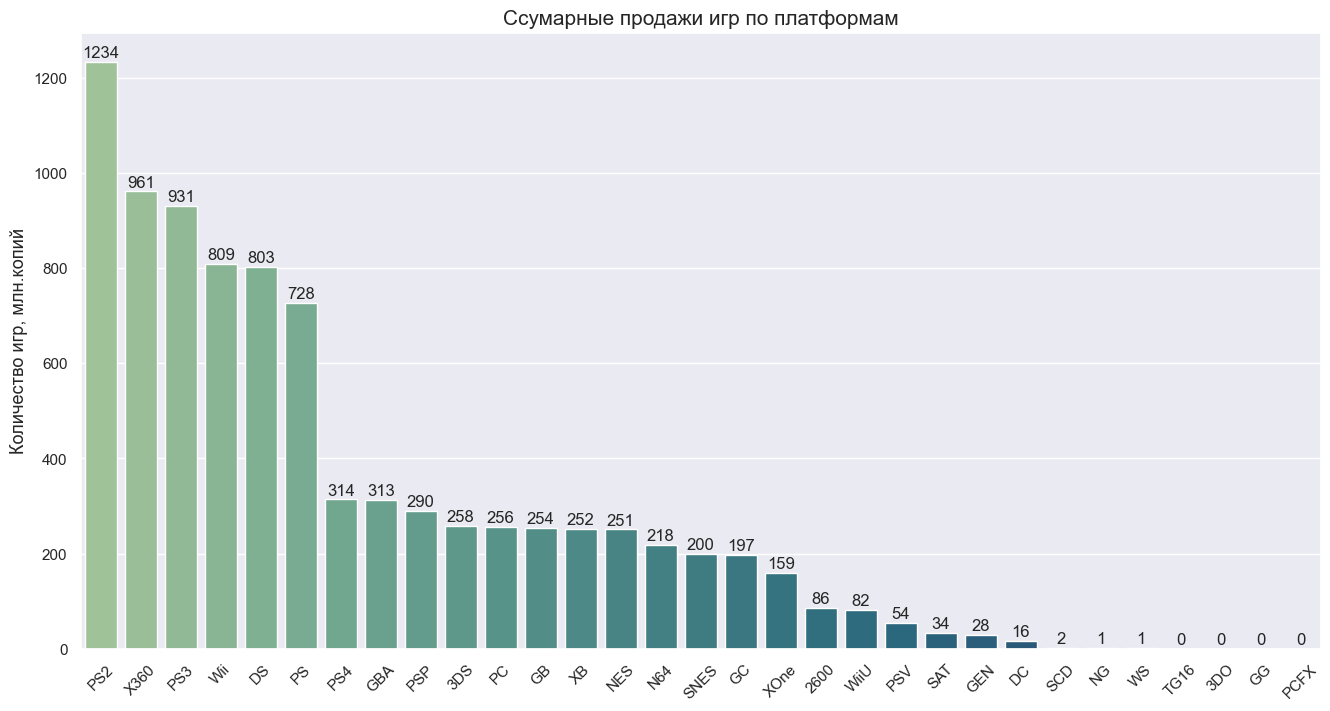

In [43]:
sbp = games.groupby('platform').agg({'global_sales':'sum'}).sort_values(by='global_sales', ascending=False).reset_index()
barplot, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'platform', y = 'global_sales', data = sbp, palette = 'crest')
ax.set_title('Ссумарные продажи игр по платформам',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 13)
rects = ax.patches
labels = [round(sbp['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )
plt.xticks(rotation = 45)
plt.show()

Среди всех регионов по ссумарным продажам лидирует платформа PS2 - более 1млрд проданных копий.  
Далее идут платформы X360 и PS3 ~ 900 млн.копий, Wii и DS ~ 800 млн.копий и замыкает шестерку лидеров платформа PS - 728 млн.проданных копий игр.  
У остальных игр показатель ссумарных продаж значительно ниже. Здесь также можно отметить что пятерка лидеров по количеству выпущенных игр и по количеству проданных копий совпадает.  
Платформа PS, выпустившая равное количество игр что и PSP, вырвалась вперед по мировым продажам относительно PSP, отчего и знанимает почетное шестое место).   

Для шести лидирующих платформ по ссумарным продажам построим распределения по годам. 

In [44]:
six_platforms = games.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')

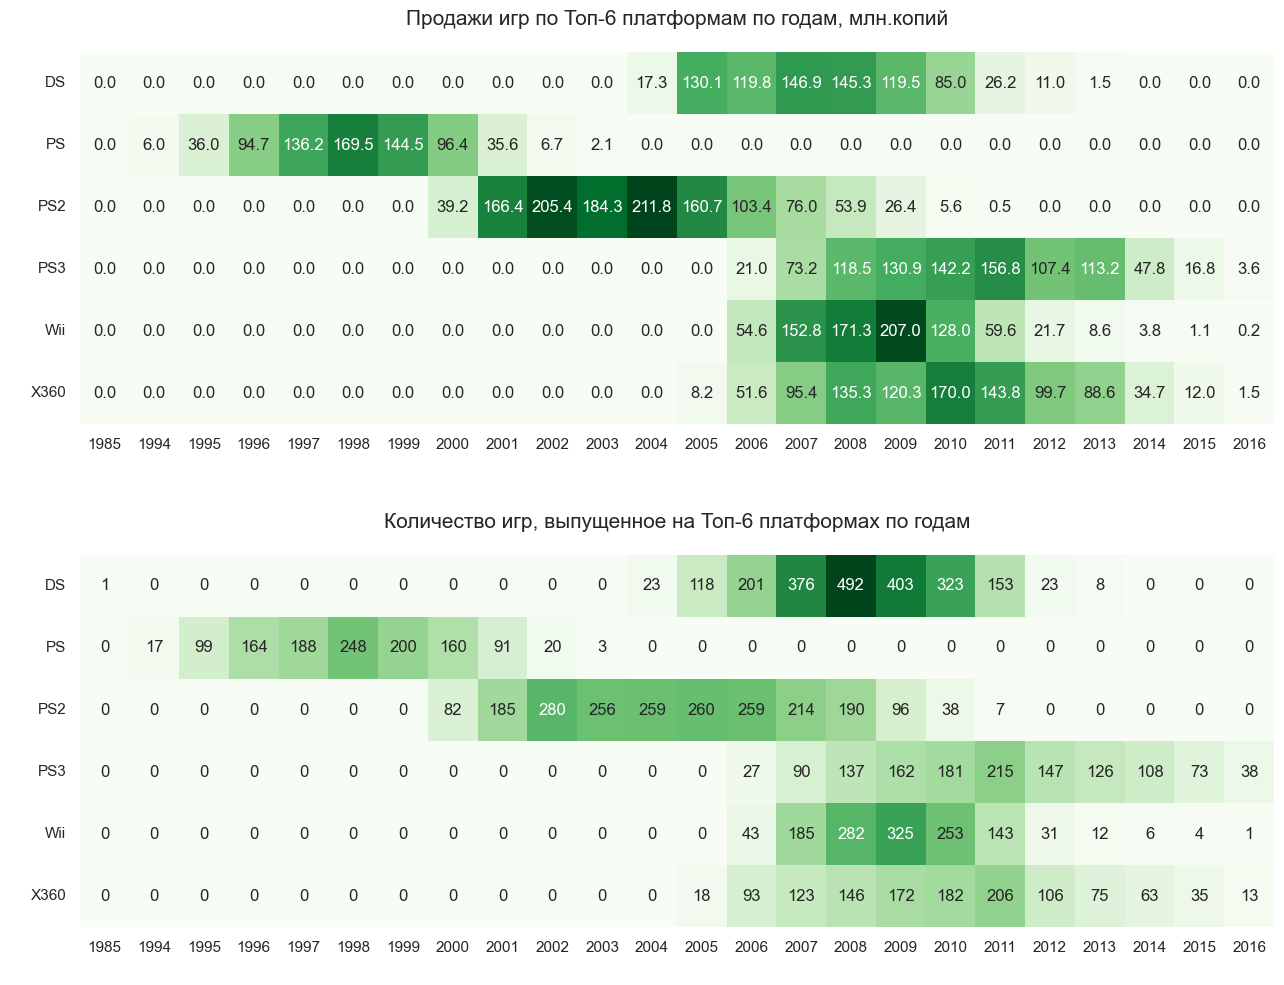

In [45]:
plt.figure(figsize=(13, 10))
ax1 = plt.subplot(2, 1, 1)
sns.heatmap((six_platforms
             .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
             .fillna(0)).T, 
            annot=True, cmap='Greens', fmt='.1f', cbar=False, ax=ax1)
plt.title('Продажи игр по Топ-6 платформам по годам, млн.копий', fontsize = 15, y = 1.05)
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(rotation = 0)
ax2 = plt.subplot(2, 1, 2)
sns.heatmap((six_platforms
             .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
             .fillna(0)).T, 
            annot=True, cmap='Greens', fmt='.0f', cbar=False, ax=ax2)
plt.title('Количество игр, выпущенное на Топ-6 платформах по годам', fontsize = 15, y = 1.05)
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.35)
plt.show() 

**Для наглядности построим линейный график по продажам по всем годам.**

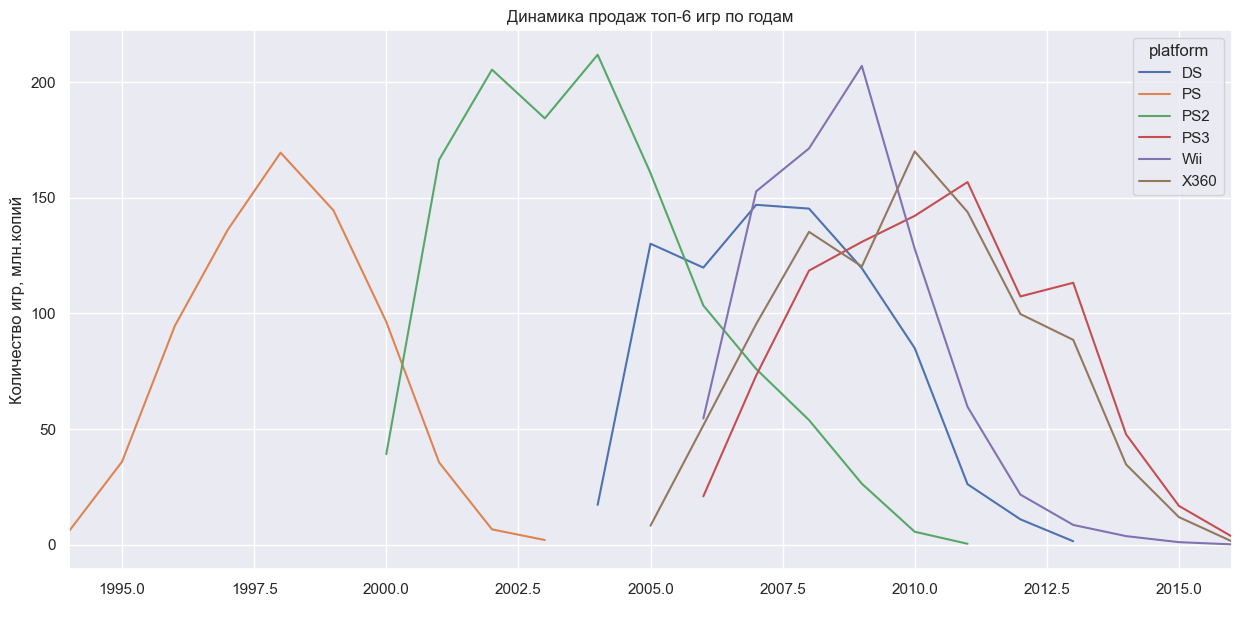

In [46]:
(six_platforms
 .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
 #.fillna(0)
 .plot(grid = True, figsize=(15,7))
)
plt.title('Динамика продаж топ-6 игр по годам')
plt.xlabel(' ')
plt.ylabel('Количество игр, млн.копий')
plt.xlim(1994, 2016)
plt.show()

На графиках хорошо прослеживается "срок жизни" платформ.  
Если говорить о времени с момента появления первых игр на платформе до прекращения их выпуска, то этот отрезок занимает в среднем 10-11 лет.  
Если смотреть на более яркоокрашенные ячейки (либо пиковые значения для линейного графика), выражающие моменты популярности игры, то этот период в среднем равен 5-6ти годам.  
В среднем, среди топ-6 платформ, максимальные продажи игр приходятся на 5й год выпуска платформы.  
Интересно что PS каждые 6 лет выпускает новое поколение игрофой платформы, и если в конце 20го века - в начале 21-го она занимала лидирующие позиции, то с 2004-2005 года подтягиваются новые платформы и занимают лидирующие места. Так платформа Wii впервые выпустившая в 2006 году 43 игры, продала более 54 миллионов копий, тогда как платформа PS2, выпустив 82 игры в 2000 году, продала 39 миллионов копий.  

Чтобы строить прогноз на 2017 год, нам необходимо определить актуальный период или срок "популярности" платформы.  
Вычислим объем продаж по всем платформам по годам, найдем медианное значение продаж по платформам (из-за большого разброса данных средняя в данном случае нам не подойдет), отфильтруем по этому значению платформы (которые продали игр больше этого значения) и посчитаем медианное количество лет.

In [47]:
# группируем данные по платформам и годам

year_platform_sales = games.groupby(['platform', 'year_of_release']).agg({'global_sales':'sum'}).reset_index()
year_platform_sales.head(10)

,platform,year_of_release,global_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


In [48]:
# найдем медианное значение ссумарных продаж по платформам
# и выведем общее медианное значение

print('\033[1;34m Медианные продажи по платформам \033[0m', 
      round(year_platform_sales.groupby('platform')['global_sales'].median().median(),1), 'млн. копий')

 Медианные продажи по платформам  17.6 млн. копий


In [49]:
# отфильтруем данные по медианному значению
# рассчитаем медианный срок "популярности" платформ

print('\033[1;34m Медианный срок популярности платформ \033[0m', 
      (year_platform_sales
       .query('global_sales > 17.6')
       .groupby(['platform'])
       .agg({'year_of_release':'nunique'}).median()[0]), 'лет')

 Медианный срок популярности платформ  5.0 лет


Данное значение соответствует увиденному ранее на графиках. Т.к. в описании к проекту указано, что данные за 2016 год могут быть неполными, в дальнейшем для планирования кампании на 2017 год мы будем использовать данные за последние 6 лет, т.е. период 2011-2016 года.

### Платформы и актуальный период

In [50]:
# отфильтруем данные по году

actual_period = games.query('year_of_release >= 2011')

In [51]:
actual_period.shape

(4021, 12)

Всего в наших данных 4021 запись за актуальный период.  

Рассмотрим количество выпущенных игр и мировые продажи за актуальный период по платформам.

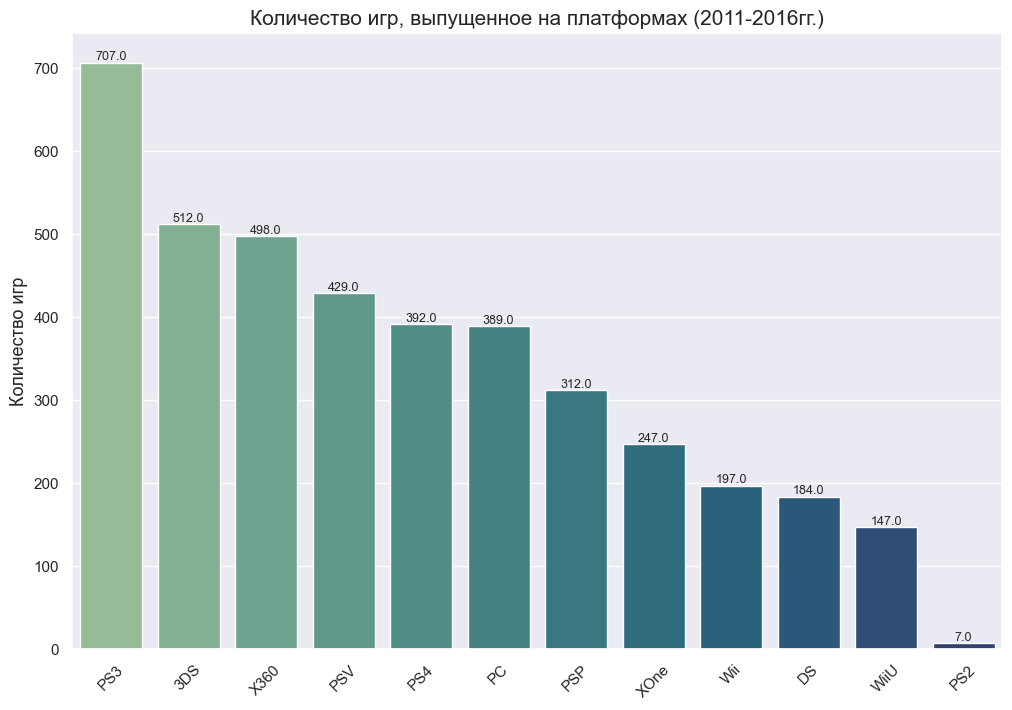

In [52]:
countplt, ax = plt.subplots(figsize = (12,8))
ax = (sns
      .countplot(x = 'platform', data = actual_period, order = actual_period['platform']
                 .value_counts()
                 .index, 
                 palette = 'crest'))
ax.set_title('Количество игр, выпущенное на платформах (2011-2016гг.)',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

По количеству выпущенных игр за актуальный период ледирует платформа PS3 (707 игр). Также в четверку лидеров попали платформы 3DS, X360 и PSV. У остальных платформ вышло менее 400 игр за 6 лет.

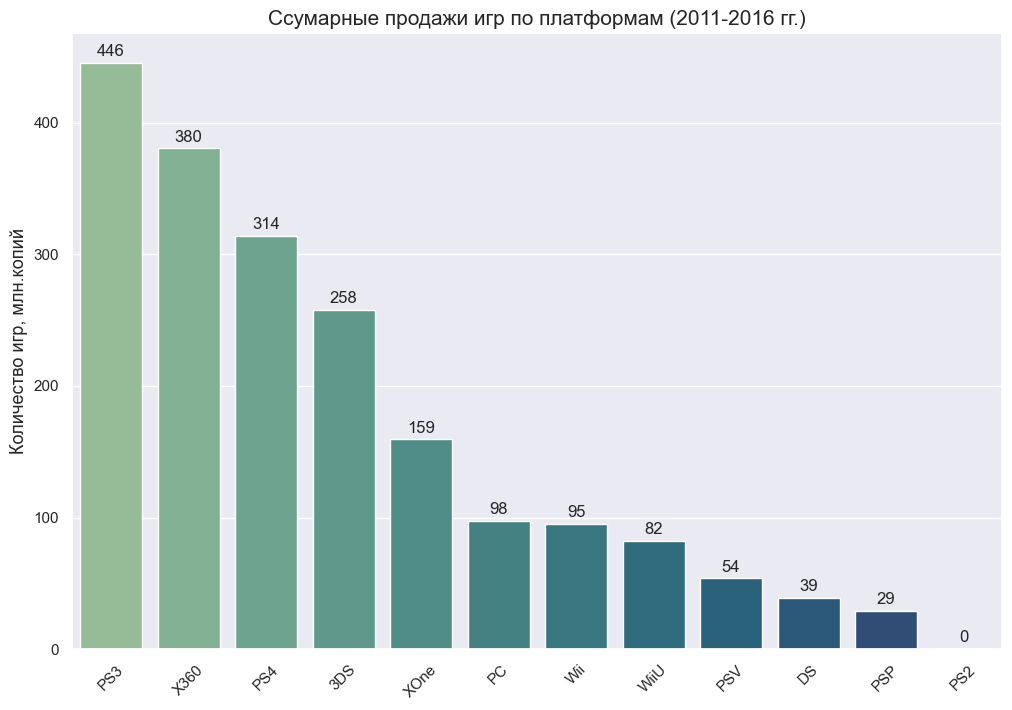

In [53]:
asbp = (actual_period
       .groupby('platform')
       .agg({'global_sales':'sum'})
       .sort_values(by='global_sales', ascending=False)
       .reset_index()
      )
barplot, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'platform', y = 'global_sales', data = asbp, palette = 'crest')
ax.set_title('Ссумарные продажи игр по платформам (2011-2016 гг.)',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 13)
rects = ax.patches
labels = [round(asbp['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )
plt.xticks(rotation = 45)
plt.show()

По глобальным продажам состав четверки немного иной. 
- Как по количеству выпущенных игр, так и по их продажам лидирует платформа PS3, далее второе место занимает платформа X360. 
- Платформа PS4, не вошедшая в четверку лидеров по количеству выпущенных игр, занимает почетное третье место, что вероятно говорит о ее растущей популярности. 
- Замыкает четверку платформа 3DS, находившаяся на втором месте по количеству игр, что в данном случае, наоборот, может говорить о том, что платформа находится на стадии угасания своей популярности. 
- Платформа PSV, выпустившая 429 игр за шесть лет (4е место по количеству игр), занимает 9е место по продажам (54 млн. проданных копий, против 446 млн. у лидера рейтинга PS3).  

Посмотрим на динамику продаж по годам.

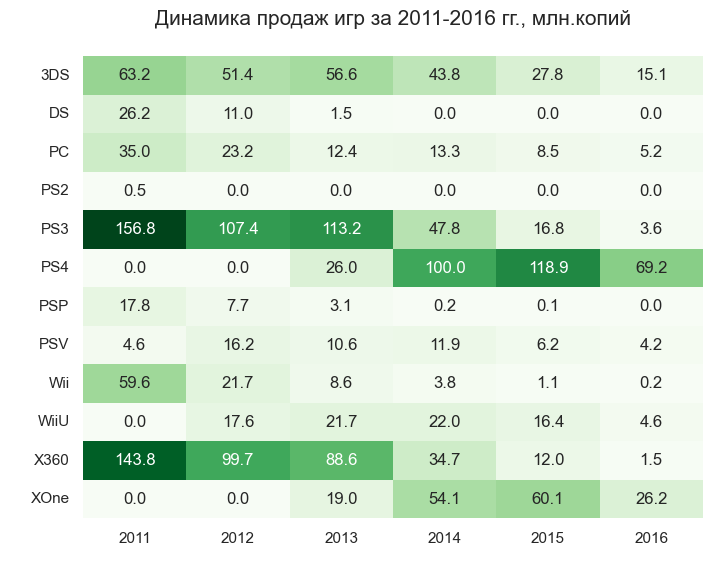

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap((actual_period
             .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
             .fillna(0)).T, 
            annot=True, cmap='Greens', fmt='.1f', cbar=False)
plt.title('Динамика продаж игр за 2011-2016 гг., млн.копий', fontsize = 15, y = 1.05)
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(rotation = 0)
plt.show() 

- Для всех платформ наблюдается снижение продаж к 2016 году.
- К концу нашего актуального периода платформы DS, PS2, PSP и Wii показывают совсем незначительные значения продаж, популярность для данных платформ практически сошла на нет. 
- Платформы PS3 и X360 демонстрируют схожую картину - разгар популярности в 2011 году (~ 150 млн.проданных копий) и далее показатели пошли на спад.
- Еще "держаться на плаву" платформы PC, PSV, WiiU - в 2016 году продажи составляли 4-5 млн. копий. 
- Платформы PS4 и XOne являются потенциально прибыльными, вышедшие в релиз в 2013 году, их пик популярности как раз будет приходится на 2017-2018 года. Сюда также можно добавить платформу 3DS, которая на протяжении всего актуального периода показывает неплохие результаты.  

Для наглядности еще построим линейный график по годам (исключим платформы, показывающие низкие результаты к 2016 году)

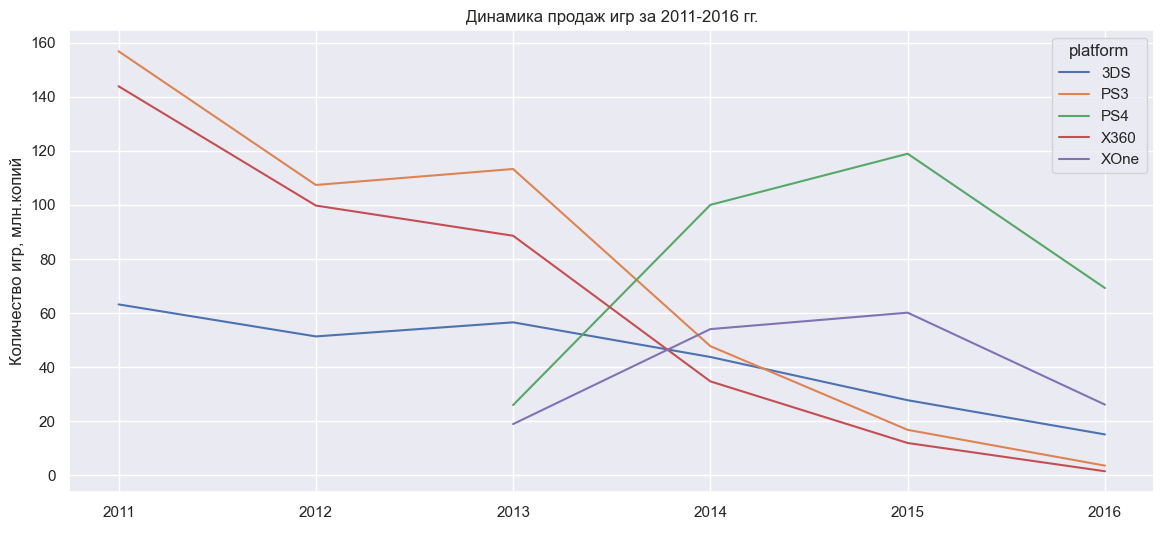

In [55]:
(actual_period
 .query('platform in ["3DS", "PS3", "PS4", "XOne", "X360"]')
 .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
 #.fillna(0)
 .plot(grid = True, figsize=(14,6))
)
plt.title('Динамика продаж игр за 2011-2016 гг.')
plt.xlabel(' ')
plt.ylabel('Количество игр, млн.копий')
plt.show()

Данный график подтверждает все вышесказанное. Для платформ PS3 и X360 продажи с 2011 года идут на спад, как и для платформы 3DS (более плавное снежение, с небольшим ростом в 2013 году). Пиковые значения продаж платформ Xone и PS4 приходятся на 2015 год, но стоит еще раз отметить, что данные за 2016 год могли быть неполными.  

**Для пятерки лидеров по глобальным продажам в актуальном периоде (PS3, PS4, X360, XOne и 3DS) построим график boxplot (или ящик с усами).**

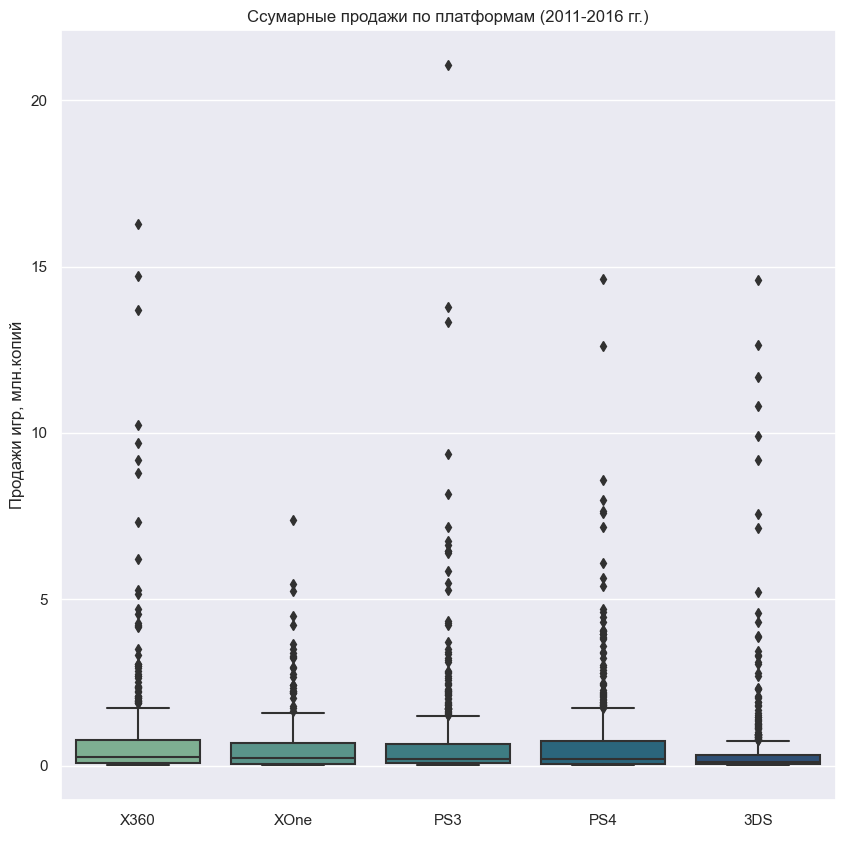

In [56]:
median_by_column = (actual_period
                  .query('platform in ["3DS", "PS3", "PS4", "X360", "XOne"]')
                  .groupby(['platform'])['global_sales']
                  .median()
                  .sort_values(ascending=False))
plt.figure(figsize=(10,10))
sns.boxplot(x = 'platform', 
            y = 'global_sales', 
            data = actual_period.query('platform in ["3DS", "PS3", "PS4", "X360", "XOne"]'), 
            palette = 'crest', 
            order = median_by_column.index)
plt.title('Ссумарные продажи по платформам (2011-2016 гг.)')
plt.xlabel(' ')
plt.ylabel('Продажи игр, млн.копий')
plt.show()

На графике мы можем наблюдать большое количество выбросов, в данном случае это наиболее успешные и популярные игры для каждой платформы. Показатели продаж, которые график определил как выбросы, начинаются приблизительно с 1.5 - 2-х миллионов копий. Рассмотрим график без выбивающихся значений.

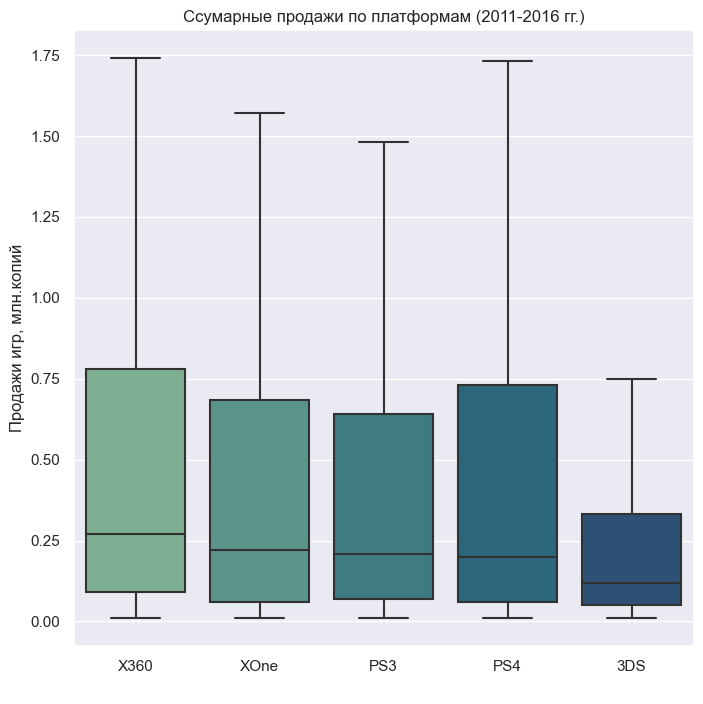

In [57]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'platform', 
            y = 'global_sales', 
            data = actual_period.query('platform in ["3DS", "PS3", "PS4", "X360", "XOne"]'), 
            palette='crest', 
            showfliers=False, 
            order=median_by_column.index)
plt.title('Ссумарные продажи по платформам (2011-2016 гг.)')
plt.xlabel(' ')
plt.ylabel('Продажи игр, млн.копий')
plt.show()

- По медианному значению ссумарных продаж игр за актуальный период лидирует платформа X360, следом идет платформа XOne, медианы платформы PS3 и PS4 находятся приблизительно на одном уровне, что может объясняться их "заменяемостью" в актуальном периоде - у PS3 продажи снижаются, когда выходит следующая и набирает обороты по популярности и продажам. 
- Платформа 3DS, хоть и показывает меньшие результаты, но уверенно держится в продажах в актуальном периоде. 
- Самые высокие верхние границы "ящиков" у платформ X360 и PS4 (~ 1.75 млн.копий), что в очередной раз подтверждает их популярность в продажах.

### Влияние отзывов  пользователей и критиков на продажи  

Рассмотрим влияние отзывов пользователей и критиков на продажи в актуальном периоде. Построим диаграммы рассеивания для четырех наиболее популярных платформ (PS3, PS4, X360, 3DS) и рассчитаем коэффициенты корреляции.

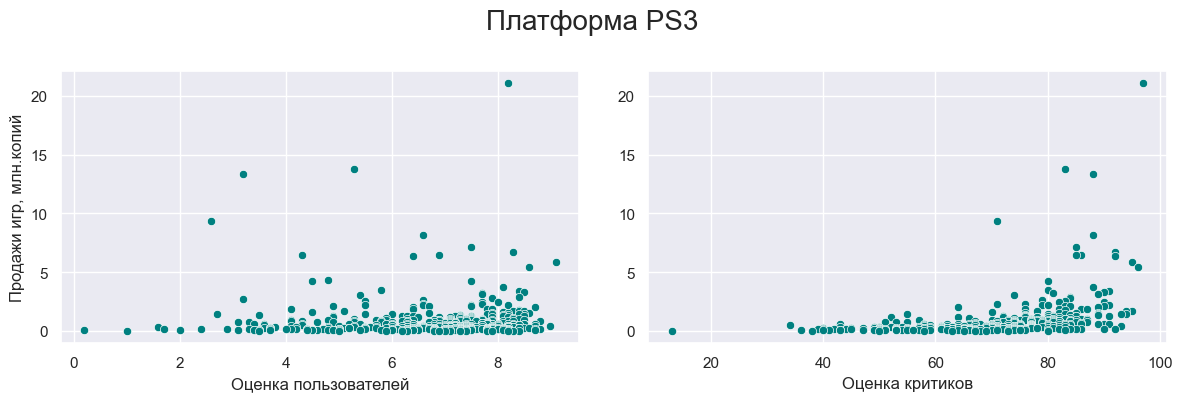

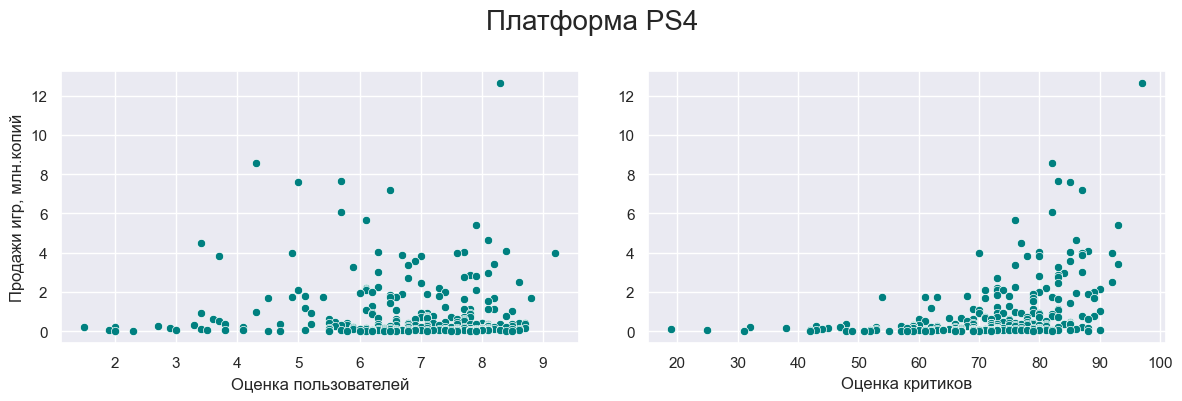

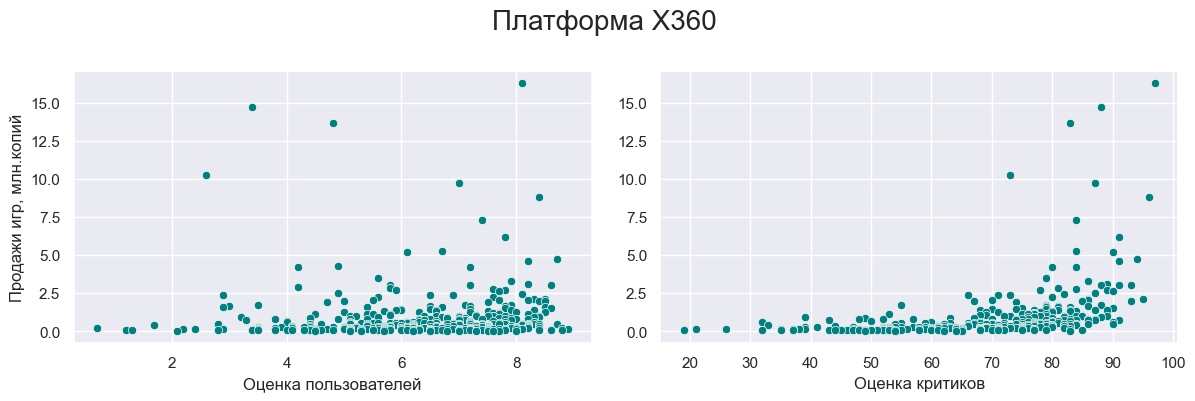

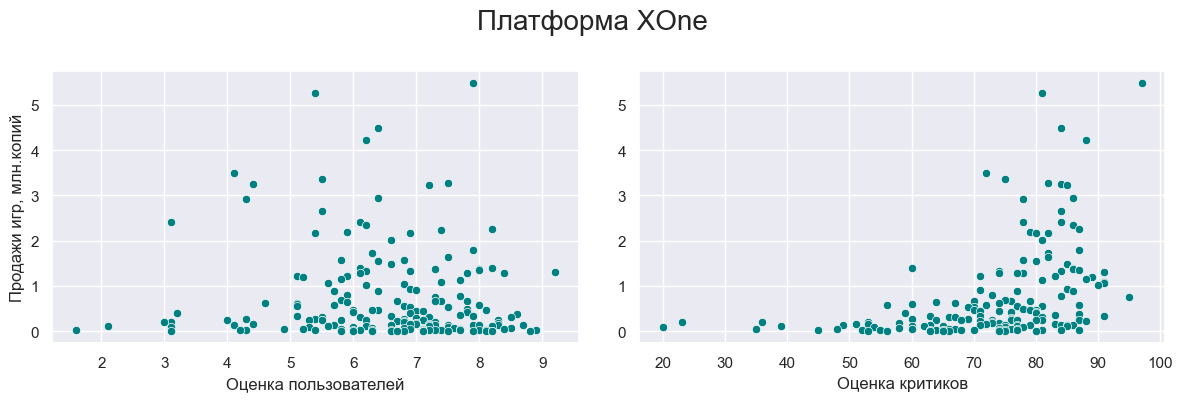

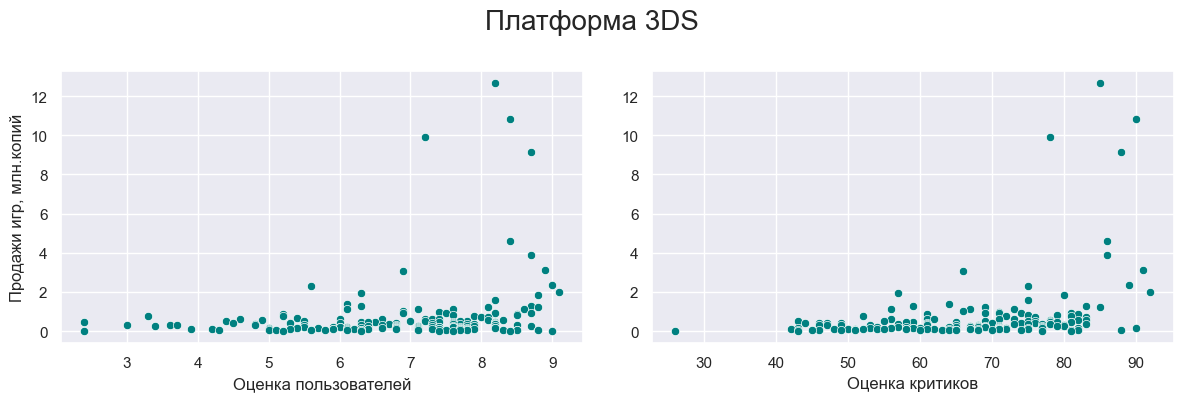

In [58]:
for platform in ['PS3', 'PS4', 'X360', 'XOne', '3DS']:
    data = actual_period[actual_period['platform'] == platform]
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 2, 1)
    plt.suptitle(f'Платформа {platform}', fontsize=20, y=1)
    sns.scatterplot(data=data, x='user_score', y='global_sales', color = 'teal', ax=ax1)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи игр, млн.копий')
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x='critic_score', y='global_sales', color = 'teal', ax=ax2)
    plt.xlabel('Оценка критиков')
    plt.ylabel(' ')
    plt.tight_layout()
    plt.show()

На первый взгляд связь продаж с оценками вообще отсутствует.  
Можно отметить что оценка критиков все же немного влияет на продажи, чем выше оценка, тем больше проданных копий.  
Более выраженная связь между продажами и оценкой критиков просматривается у платформы PS4 и XOne.  
Основная масса оценок критиков находится в диапазоне 70-80 и лишь немногие игры смогли получить оценку больше 90 баллов.  
Среди игроков наблюдается приблизительно та же картина, чаще игры оценивались в 7-8 баллов и только единицы получали 9 баллов и выше.  
Интересно, что игры с низкими оценками пользователей (3-4 балла) имеют высокие показатели продаж.

Рассчитаем коэффициенты корреляции

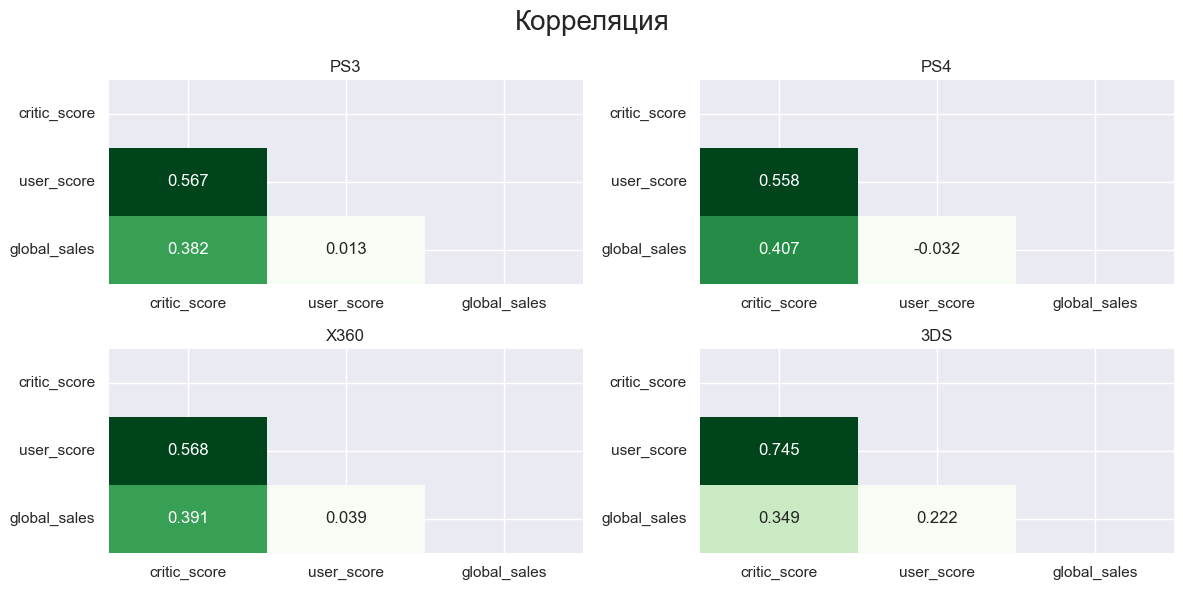

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
fig.suptitle('Корреляция', fontsize=20)
for platform, ax in zip(['PS3', 'PS4', 'X360', '3DS'], axes.ravel()):
    data = actual_period[actual_period['platform'] == platform]
    mask = np.triu(data[['critic_score', 'user_score', 'global_sales']].corr())
    (sns.heatmap(data[['critic_score', 'user_score', 'global_sales']].corr(), 
                 annot=True, mask=mask, cbar=False, cmap='Greens', fmt='.3f', ax=ax))
    ax.set_title(platform, fontsize=12)
plt.tight_layout()
plt.show()

Действительно, связь между продажами игр и оценкой пользователей отсутствует (интересно что у платформы 3DS коэффициент составляет 0.22, возможно в свое время она наделала много шума).  
Умеренная связь между оценкой критиков и продажами по всем платформам (0.35 - 0.41), что говорит о влиянии отзывов критиков на продажи.  
Коэффициент корреляции показывает заметную связь между отзывами критиков и пользователей по всем платформам (более 0.5, а для платформы 3DS - более 0.7).  

Но т.к. в наших данных имеются сильновыбивающиеся значения, воспользуемся еще ранговой корреляцией Спирмана, которая используется для измерения корреляции между двумя ранжированными переменными (такие как оценки) .

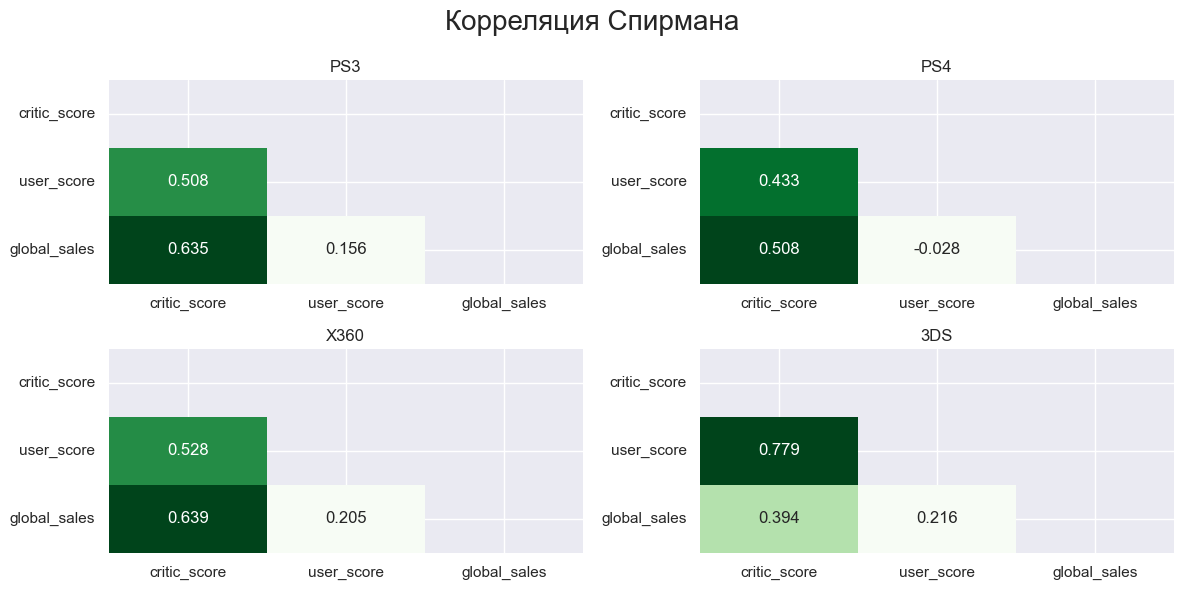

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
fig.suptitle('Корреляция Спирмана', fontsize=20)
for platform, ax in zip(['PS3', 'PS4', 'X360', '3DS'], axes.ravel()):
    data = actual_period[actual_period['platform'] == platform]
    mask = np.triu(data[['critic_score', 'user_score', 'global_sales']].corr(method='spearman'))
    (sns.heatmap(data[['critic_score', 'user_score', 'global_sales']].corr(method='spearman'), 
                 annot=True, mask=mask, cbar=False, cmap='Greens', fmt='.3f', ax=ax))
    ax.set_title(platform, fontsize=12)
plt.tight_layout()
plt.show()

В целом картина не изменилась, оценки пользователей не влияют на продажи, заметная корреляционная связь между отзывами критиков и игроков.  
Для платформы 3DS связь между оценкой критиков и продажами не изменилась (умеренная = 0.4), для остальных платформ мы видим заметную корреляционную связь (0.5 - 0.6), что еще раз подтверждает влияние отзывов критиков на продажи.  

Посмотрим какое количество игр по каждой платформе в актуальном периоде получило максимальные оценки от критиков (> 90 баллов)

In [61]:
actual_period[actual_period['critic_score'] > 90].groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS3     15
X360    10
PC       9
XOne     6
PS4      5
WiiU     3
3DS      2
PSV      2
Wii      2
Name: name, dtype: int64

Больше всего успешных игр, по мнению критиков, выпустила платформа PS3 (у 15ти игр оценка более 90 баллов), далее следует платформа X360  (10 игр) и замыкает тройку платформа РС - 9 игр в актуальном периоде.  

И посмотрим на максимальные продажи среди игр, получивших высокую оценку критиков.

In [62]:
(
    actual_period[actual_period['critic_score'] > 90]
    .groupby(['name', 'platform'])['global_sales']
    .sum()
    .nlargest(10)
    .reset_index()
)

,name,platform,global_sales
0,Grand Theft Auto V,PS3,21.05
1,Grand Theft Auto V,X360,16.27
2,Grand Theft Auto V,PS4,12.62
3,The Elder Scrolls V: Skyrim,X360,8.79
4,Uncharted 3: Drake's Deception,PS3,6.74
5,The Elder Scrolls V: Skyrim,PS3,6.40
6,Gears of War 3,X360,6.21
7,The Last of Us,PS3,5.86
8,Batman: Arkham City,PS3,5.48
9,Grand Theft Auto V,XOne,5.47


Среди игр, высокооцененных критиками, самой продаваемой оказалась игра GTA V сразу на трех платформая: PS3, X360 и PS4.  
Уберем фильтрацию по оценке критиков и сравним с продажами игр в общей массе за актуальный период.

In [63]:
actual_period.groupby(['name', 'platform'])['global_sales'].sum().nlargest(10).reset_index()

,name,platform,global_sales
0,Grand Theft Auto V,PS3,21.05
1,Grand Theft Auto V,X360,16.27
2,Call of Duty: Modern Warfare 3,X360,14.73
3,Call of Duty: Black Ops 3,PS4,14.63
4,Pokemon X/Pokemon Y,3DS,14.60
5,Call of Duty: Black Ops II,PS3,13.79
6,Call of Duty: Black Ops II,X360,13.68
7,Call of Duty: Modern Warfare 3,PS3,13.33
8,Mario Kart 7,3DS,12.65
9,Grand Theft Auto V,PS4,12.62


Игра GTA V также лидирует в продажах на платформах PS3 и X360. Теперь на третьем месте по продажам игра Call of Duty: Modern Warfare 3 от платформы X360 и четвертое место у игры Call of Duty: Black Ops 3 платформы PS4.  
Взглянем на их оценки.

In [64]:
actual_period.query('name == "Grand Theft Auto V"')[['name', 'platform', 'user_score', 'critic_score', 'global_sales']]

,name,platform,user_score,critic_score,global_sales
15,Grand Theft Auto V,PS3,8.2,97.0,21.05
22,Grand Theft Auto V,X360,8.1,97.0,16.27
41,Grand Theft Auto V,PS4,8.3,97.0,12.62
164,Grand Theft Auto V,XOne,7.9,97.0,5.47
1709,Grand Theft Auto V,PC,7.9,96.0,1.17


In [65]:
(actual_period
 .query('name == "Call of Duty: Modern Warfare 3"')
 [['name', 'platform', 'user_score', 'critic_score', 'global_sales']])

,name,platform,user_score,critic_score,global_sales
28,Call of Duty: Modern Warfare 3,X360,3.4,88.0,14.73
36,Call of Duty: Modern Warfare 3,PS3,3.2,88.0,13.33
1028,Call of Duty: Modern Warfare 3,PC,2.5,78.0,1.71
2465,Call of Duty: Modern Warfare 3,Wii,1.8,70.0,0.83


In [66]:
actual_period.query('name == "Call of Duty: Black Ops 3"')[['name', 'platform', 'user_score', 'critic_score', 'global_sales']]

,name,platform,user_score,critic_score,global_sales
30,Call of Duty: Black Ops 3,PS4,NaN,NaN,14.63
98,Call of Duty: Black Ops 3,XOne,NaN,NaN,7.39
1037,Call of Duty: Black Ops 3,X360,NaN,NaN,1.70
1050,Call of Duty: Black Ops 3,PS3,NaN,NaN,1.69
6362,Call of Duty: Black Ops 3,PC,NaN,NaN,0.26


Игра GTA V была высоко оценена не только критиками, но и пользователями (~ 8 баллов).  
Занявшая третье место по продажам игра Call of Duty: Modern Warfare 3 получила от критиков 88 баллов, тогда как пользователи ее совсем не оценили - максимум 3.4 балла, что еще раз может подтверждать отсутствие связи между продажами игр и отзывами пользователей.  
У игры Call of Duty: Black Ops 3 отзывы критиков и пользователей отсутствуют.

### Жанры игр и актуальный период

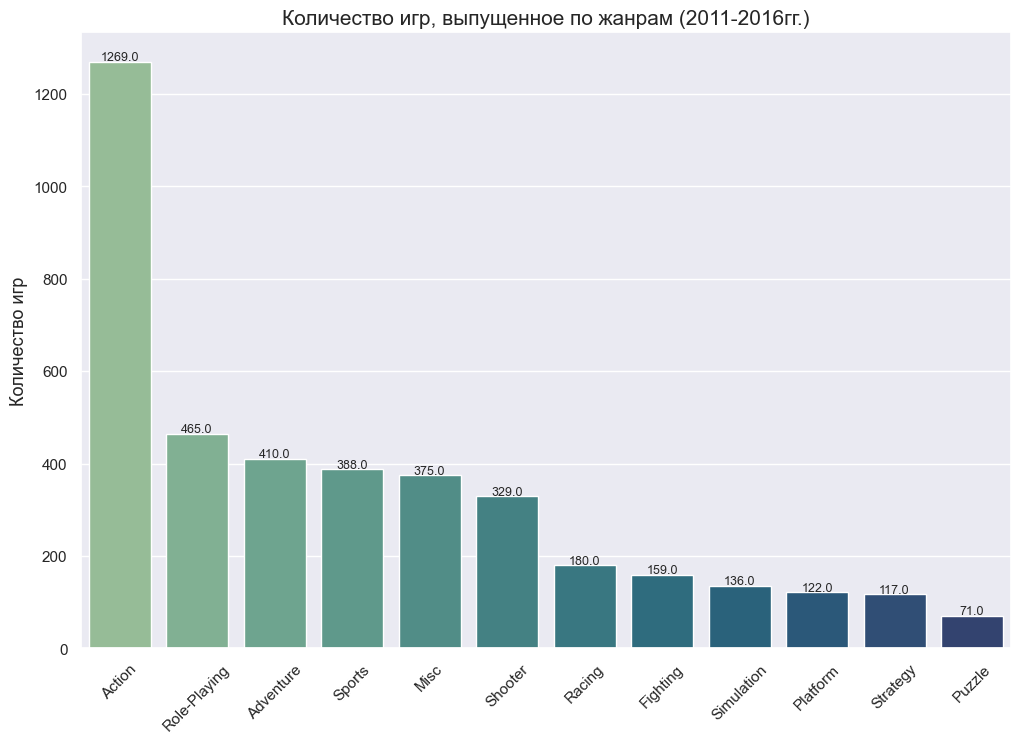

In [67]:
countplt, ax = plt.subplots(figsize = (12,8))
ax = (sns
      .countplot(x = 'genre', data = actual_period, order = actual_period['genre']
                 .value_counts()
                 .index, 
                 palette = 'crest'))
ax.set_title('Количество игр, выпущенное по жанрам (2011-2016гг.)',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

Всего за актуальный период представлено 12 различных жанров игр. Больше всего было выпущенно игр в жанре Action (1269 игр), далее следуют жанры Role-Playing и Adventure. Меньше всего игр было выпущено в жанре Puzzle.  

Посмотрим на продажи по жанрам.

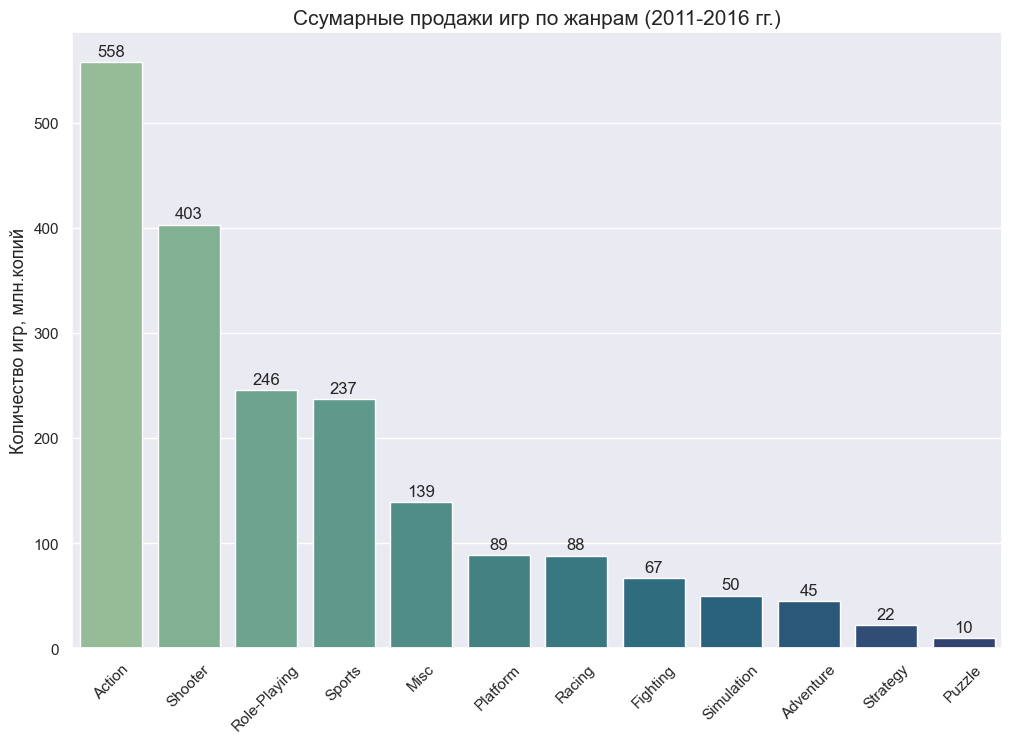

In [68]:
asbg = (actual_period
       .groupby('genre')
       .agg({'global_sales':'sum'})
       .sort_values(by='global_sales', ascending=False)
       .reset_index()
      )
barplot, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'genre', y = 'global_sales', data = asbg, palette = 'crest')
ax.set_title('Ссумарные продажи игр по жанрам (2011-2016 гг.)',fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 13)
rects = ax.patches
labels = [round(asbg['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )
plt.xticks(rotation = 45)
plt.show()

- Жанр Action лидирует и по количеству проданных копий (558 миллионов)
- На второе место по продажам (403 млн.копий) выходит жанр Shooter (занимающий 6-е место по количеству выпущенных игр), что явно говорит о популярности игр в данном жанре. 
- Третье и четвертое место, приблизительно с равными продажами, занимают жанры Role-Playing  и Sports (~ 240 млн.копий)
- Самые низкие продажи у жанров Strategy (22 млн.копий) и Puzzle (10 млн.копий)  

Рассмотрим медианные продажи игр по жанрам. Построим график boxplot.

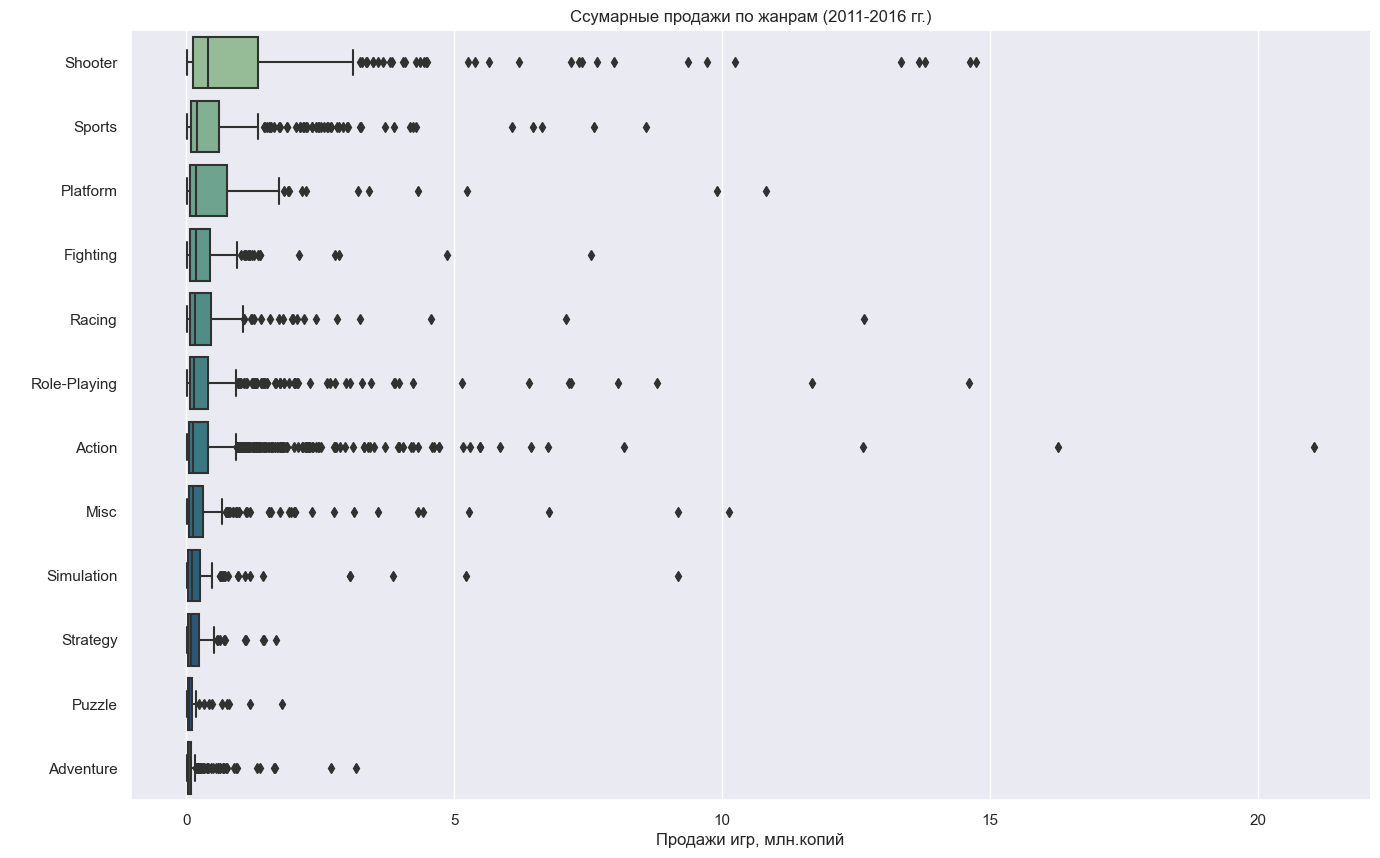

In [69]:
median_by_column = (actual_period
                  .groupby(['genre'])['global_sales']
                  .median()
                  .sort_values(ascending=False))
plt.figure(figsize=(16,10))
sns.boxplot(x = 'global_sales', 
            y = 'genre', 
            data = actual_period, 
            palette = 'crest', 
            order = median_by_column.index)
plt.title('Ссумарные продажи по жанрам (2011-2016 гг.)')
plt.xlabel('Продажи игр, млн.копий')
plt.ylabel(' ')
plt.show()

Мы снова видим большое количество выбивающихся значений, это игры набравшие наибольшую популярность после их релиза.  
Рассмотрим график более близко. 

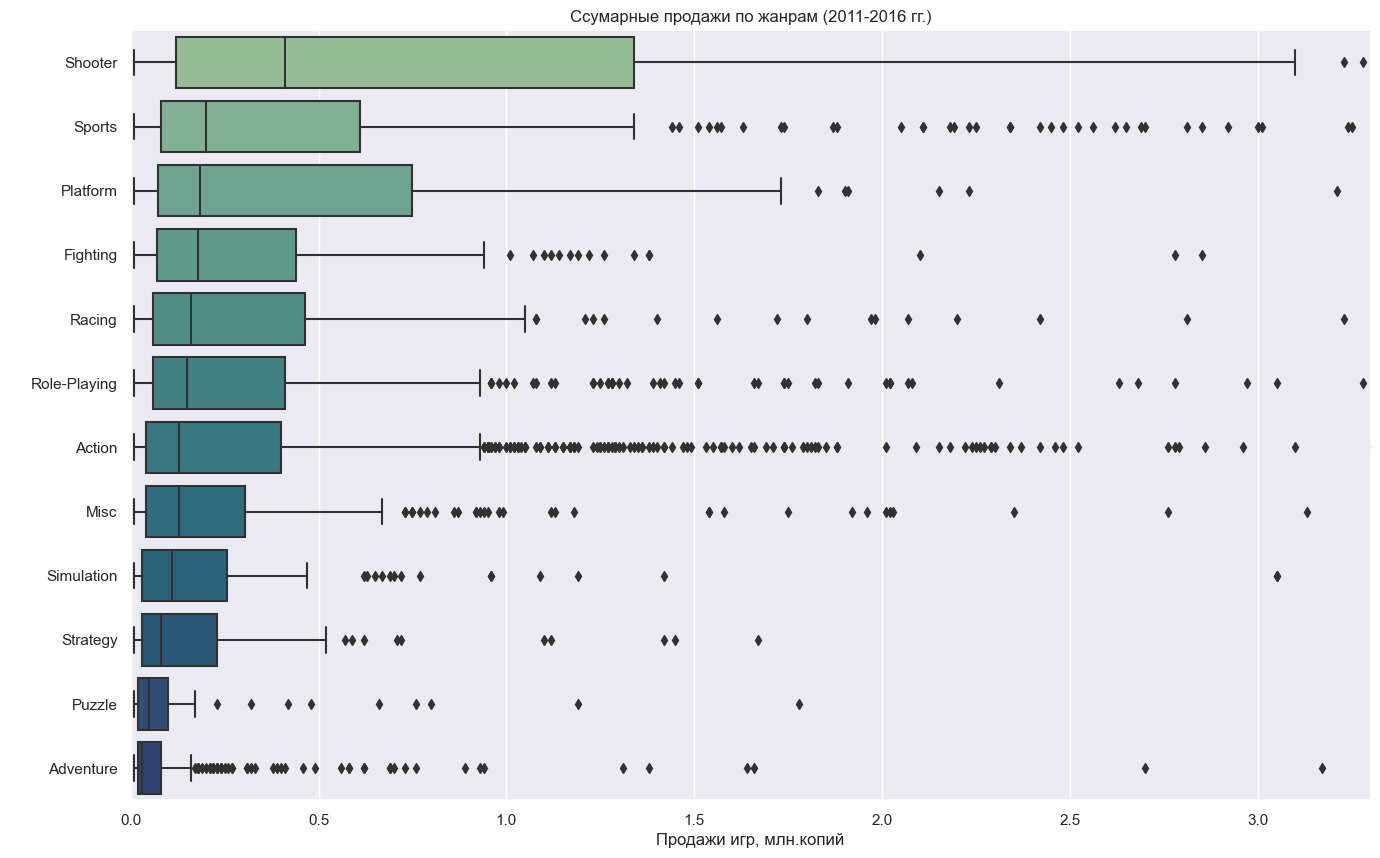

In [70]:
median_by_column = (actual_period
                  .groupby(['genre'])['global_sales']
                  .median()
                  .sort_values(ascending=False))
plt.figure(figsize=(16,10))
sns.boxplot(x = 'global_sales', 
            y = 'genre', 
            data = actual_period, 
            palette = 'crest', 
            order = median_by_column.index)
plt.title('Ссумарные продажи по жанрам (2011-2016 гг.)')
plt.xlabel('Продажи игр, млн.копий')
plt.ylabel(' ')
plt.xlim(0, 3.3)
plt.show()

Здесь сразу можно отметить, что лидерский состав изменился по значениям медианных продаж.  
На первое место выходит жанр Shooter, у него самый высокий показатель медианных продаж и самый широкий размах (~ 0.1 - 3.2 млн. копий), второе и третье место занимают жанры Sports и Platform.  
Жанр Action, лидирующий как по количеству выпущенных игр, так и по продажам в актуальном периоде, по медианному значению занимает 7-е место, что говорит о его успешности только за счет выпущенных бестселлеров.  
Жанр Puzzle стабильно находится внизу рейтинга, интересно что жанр Adventure, занимающий третье место по количеству выпущенных игр, по медианному значению продаж показывает себя хуже всех.  

Поссмотрим на самые продаваемые игры по жанрам за актуальный период.

In [71]:
actual_period.groupby(['name', 'genre'])['global_sales'].sum().nlargest(10).reset_index()

,name,genre,global_sales
0,Grand Theft Auto V,Action,56.58
1,Call of Duty: Modern Warfare 3,Shooter,30.60
2,Call of Duty: Black Ops II,Shooter,29.40
3,Call of Duty: Ghosts,Shooter,27.39
4,Call of Duty: Black Ops 3,Shooter,25.67
5,Minecraft,Misc,24.16
6,Call of Duty: Advanced Warfare,Shooter,21.97
7,The Elder Scrolls V: Skyrim,Role-Playing,21.14
8,FIFA 15,Sports,17.37
9,Battlefield 3,Shooter,17.27


Лидирует уже знакомая нам игра GTA V в жанре Action, за актуальный период было продано 56.58 млн.копий.  
Следом в жанре Shooter идет игра Call of Duty сразу в 4х раличных обновлениях, среди них больше всего было продано копий Call of Duty: Modern Warfare 3 (30.6 миллионов). В жанре Misc самая популярная игра Minecraft (24.16 млн.копий), у жанра Role-Playing фаворит The Elder Scrolls V: Skyrim (21.14 млн.копий) и в жанре спорт лидирует игра FIFA 15 (17.37 млн. копий).

**Выводы**:  
- <ins>Игры за весь представленный период:</ins>  
 - Массово игры начали выпускаться с 1995 года (в наших данных период с 1980 по 2016 г). 2008 и 2009 года стали самыми успешными как по количеству выпущенных игр (1425 и 1426 соответственно) так и по мировым продажам (более 650 млн. копий), далее наблюдается спад вплоть до 2016 года. 
 - Больше всего игр было выпущенно на платформах PS2 (лидирует и по продажам за весь период) и DS (2126 и 2121 соответственно). Пятерка лидеров по количеству выпущенных игр и по количеству проданных копий совпадает: PS2, PS3, DS, X360 и Wii.
 - "Срок жизни" платформы в среднем составляет 10-11 лет, "срок популярности" в районе 5-6ти лет.  
- <ins>Игры за актуальный период (2011-2016 гг.):</ins>  
 - Как по количеству выпущенных игр (707), так и по их продажам (446 млн.копий) лидирует платформа PS3, далее второе место занимает платформа X360 (лидирует по медианному значению продаж в актуальном периоде). Платформа PS4, не вошедшая в четверку лидеров по количеству выпущенных игр, занимает почетное третье место, что вероятно говорит о ее растущей популярности. Замыкает четверку платформа 3DS.
 - В динамике продаж по годам для всех платформ наблюдается снижение к 2016 году. Платформы PS4 и XOne являются потенциально прибыльными, вышедшие в релиз в 2013 году, их пик популярности как раз будет приходится на 2017-2018 года. Сюда также можно добавить платформы 3DS и X360, которые на протяжении всего актуального периода показывают неплохие результаты.  
- <ins>Отзывы пользователей и критиков:</ins>
 - Пользователи чаще оценивали игры в 7-8 баллов и только единицы получали 9 баллов и выше. В целом продажи не сильно зависят от оценок пользователей.
 - Оценка критиков влияет на продажи, чем выше оценка, тем больше проданных копий. Основная масса оценок критиков находится в диапазоне 70-80 и лишь немногие игры смогли получить оценку больше 90 баллов.
 - Коэффициент корреляции Пирсона показывает умеренную связь между оценкой критиков и продажами по всем платформам (0.35 - 0.41) и заметную связь между отзывами критиков и пользователей по всем платформам (более 0.5, а для платформы 3DS - более 0.7)
 - Коэффициент корреляции Спирмана. Оценки пользователей также не влияют на продажи, заметная корреляционная связь между отзывами критиков и игроков. Для платформы 3DS связь между оценкой критиков и продажами не изменилась (умеренная = 0.4), для остальных платформ мы видим заметную корреляционную связь (0.5 - 0.6), что еще раз подтверждает влияние отзывов критиков на продажи. 
 - Больше всего успешных игр, по мнению критиков (оценка более 90 баллов), выпустила платформа PS3 (15 игр), X360  (10 игр) и замыкает тройку платформа РС - 9 игр в актуальном периоде.  
- <ins>Жанры игр:</ins>
 - Всего за актуальный период представлено 12 различных жанров
 - Больше всего было выпущенно игр в жанре Action (1269 игр), он же лидирует и по количеству проданных копий (558 миллионов). На втором месте по продажам (403 млн.копий) жанр Shooter (занимающий 6-е место по количеству выпущенных игр), что явно говорит о популярности игр в данном жанре. Третье и четвертое место, приблизительно с равными продажами, занимают жанры Role-Playing  и Sports (~ 240 млн.копий). Самые низкие продажи у жанров Strategy (22 млн.копий) и Puzzle (10 млн.копий)
 - По медианным продажам первое место занимает жанр Shooter, у него самый высокий показатель медианных продаж и самый широкий размах (~ 0.1 - 3.2 млн. копий), второе и третье место занимают жанры Sports и Platform. Жанр Action, лидирующий как по количеству выпущенных игр, так и по продажам в актуальном периоде, по медианному значению занимает 7-е место, что говорит о его успешности только за счет выпущенных бестселлеров. Жанр Puzzle стабильно находится внизу рейтинга, интересно что жанр Adventure, занимающий третье место по количеству выпущенных игр, по медианному значению продаж показывает себя хуже всех. 
 - Среди игр самая продаваемая игра GTA V в жанре Action, за актуальный период было продано 56.58 млн.копий. Следом в жанре Shooter идет игра Call of Duty сразу в 4х раличных обновлениях, среди них больше всего было продано копий Call of Duty: Modern Warfare 3 (30.6 миллионов). В жанре Misc самая популярная игра Minecraft (24.16 млн.копий), у жанра Role-Playing фаворит The Elder Scrolls V: Skyrim (21.14 млн.копий) и в жанре спорт лидирует игра FIFA 15 (17.37 млн. копий).

## Шаг 3. Портрет пользователя для каждого региона  

**Самые популярные платформы (Топ-5)**

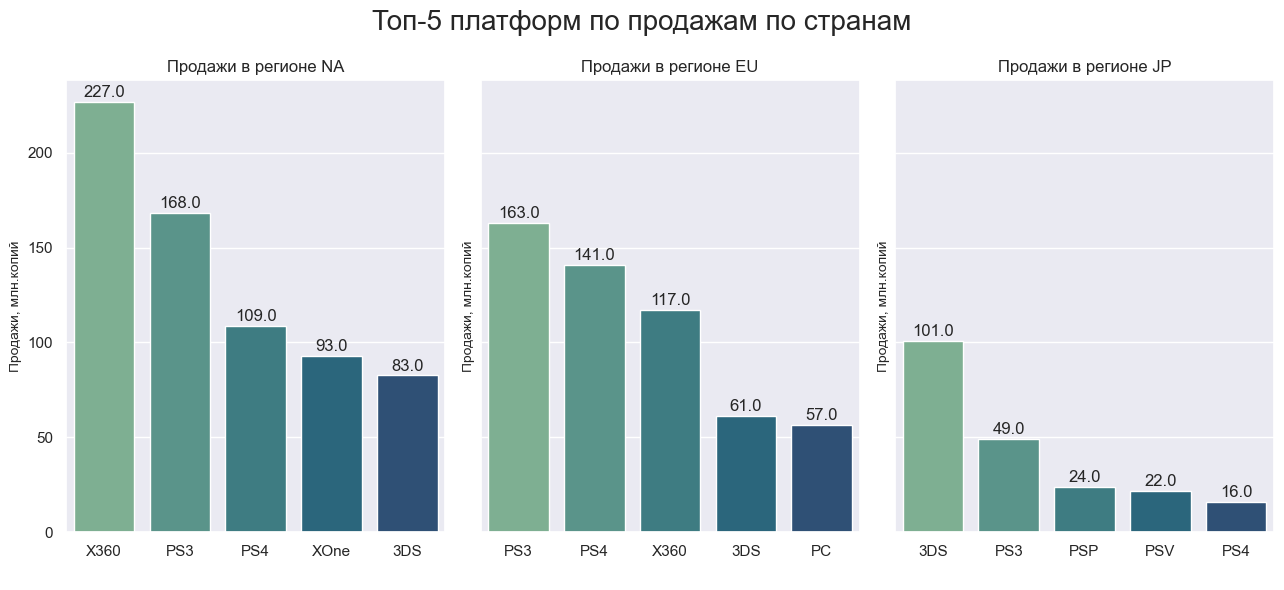

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6), sharey=True)
fig.suptitle('Топ-5 платформ по продажам по странам', fontsize=20)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    top = actual_period.pivot_table(index='platform', values=region, aggfunc='sum').reset_index().nlargest(5, region)
    sns.barplot(x = 'platform', y = region, data = top, palette = 'crest', ax=ax)
    rects = ax.patches
    labels = round(top[region])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom")
    ax.set_title(f'Продажи в регионе {region.upper()[:2]}', fontsize=12)
    ax.set_ylabel('Продажи, млн.копий', fontsize=10)
    ax.set_xlabel(' ')
plt.tight_layout()
plt.show()

- Северная Америка лидирует по ссумарным продажам, далее следует Европа и Япония.  
- Лидеры продаж по странам различаются, так в Северной Америке лидирует платформа X360 (более 200 млн. копий), в Европе фаворит PS3, в Японии предпочитают портативные игровые системы (3DS).  
- Состав топ-5 платформ в Северной Америке и Европе схожий, в Японии, попимо PS3 и PS4, присутствуют платформы PSP и PSV, которые как и 3DS являются портативной игровой консолью, что объясняется их исторически сложившейся популярностью из-за особенностей образа жизни в Японии.  
- Платформа PS3 имеет приблизительно равные продажи в Северной Америке и Европе (более 160 млн. копий), портативная консоль 3DS лидирует в Японии (101 млн. копий), когда в Америке она на пятом месте (83 млн.) и в Европе на четвертом (61 млн.).  

Рассмотрим доли продаж топ-5 платформ в разрезе страны и по глобальным продажам.

In [73]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top = (actual_period
           .pivot_table(index='platform', values=[region, 'global_sales'], aggfunc='sum')
           .sort_values(by = region, ascending=False).reset_index())
    top['share_by_region'] = round(top[region]/top[region].sum()*100,1)
    top['global_share'] = round(top[region]/top['global_sales']*100,1)
    print(f'\n\033[1;34m Доля продаж игр на топ-5 платформах в регионе {region.upper()[:2]} \033[0m')
    display(top[['platform', 'share_by_region', 'global_share']].head())


 Доля продаж игр на топ-5 платформах в регионе NA 


,platform,share_by_region,global_share
0,X360,27.3,59.6
1,PS3,20.3,37.8
2,PS4,13.1,34.6
3,XOne,11.2,58.4
4,3DS,10.0,32.1



 Доля продаж игр на топ-5 платформах в регионе EU 


,platform,share_by_region,global_share
0,PS3,24.3,36.6
1,PS4,21.1,44.9
2,X360,17.5,30.8
3,3DS,9.1,23.8
4,PC,8.5,58.0



 Доля продаж игр на топ-5 платформах в регионе JP 


,platform,share_by_region,global_share
0,3DS,41.0,39.0
1,PS3,20.1,11.1
2,PSP,9.8,82.9
3,PSV,8.9,40.6
4,PS4,6.5,5.1


- Основным рынком для игр на платформы X360 является Северная Америка, на ее долю приходится 60% глобальных продаж. Игры для данной платформы также лидируют в Северной Америке с долей 27% среди всех игровых приставок. Следует отметить, что основным регионом для четвертой по продажам видеоигр приставки XOne также является Северная Америка с долей 58.4% от мировых продаж. Таким образом компания Microsoft крайне успешна на рынке видеоигр в Северной Америке.  
- Позиции компании Microsoft менее сильны в европейском регионе, где основные продажи видеоигр приходятся на игровые приставки компании Sony: PS3 - 37%, PS4 - 45% от мировых продаж. Примечательно, что игры для PC, занимающие пятое место по популярности в регионе, имеют долю почти 60 % от мировых продаж. 
- Как и было сказано ранее, портативные игровые консоли очень популярны в Японии, игры для 3DS занимают 39% глобальных продаж, а доля PSP - более 80%. Стоит отметить, что среди топ-5 платформ представлены исключительно Японские игровые приставки и консоли.  

**Самые популярные жанры (топ-5)**

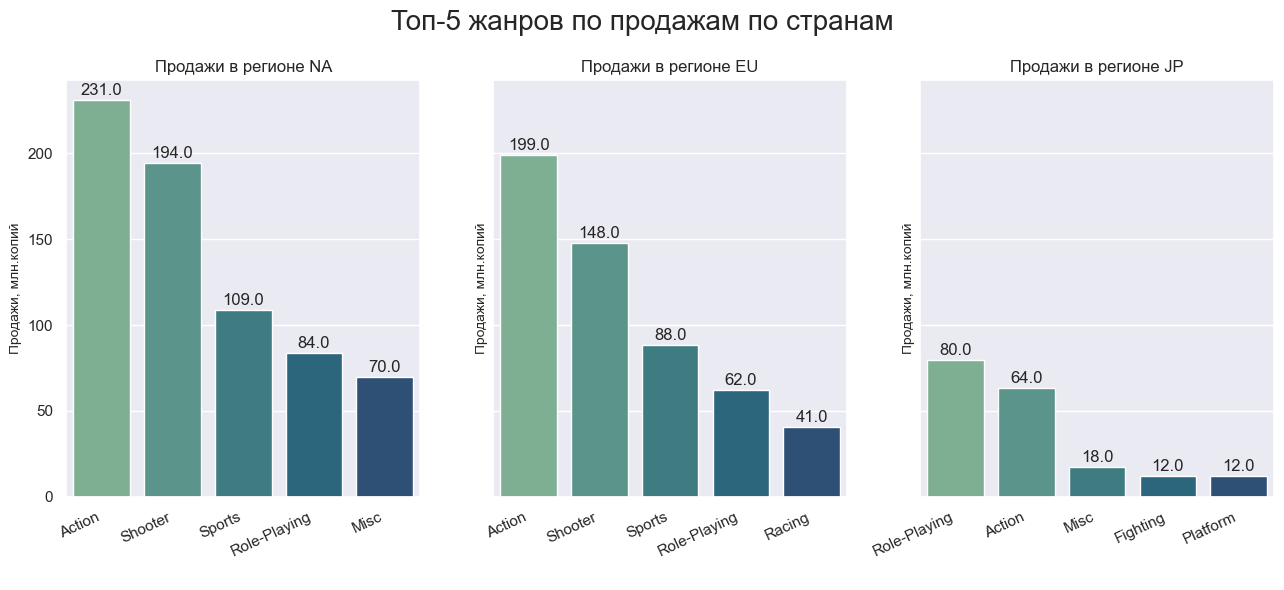

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6), sharey=True)
fig.suptitle('Топ-5 жанров по продажам по странам', fontsize=20)
fig.autofmt_xdate(rotation=25)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    top = actual_period.pivot_table(index='genre', values=region, aggfunc='sum').reset_index().nlargest(5, region)
    sns.barplot(x = 'genre', y = region, data = top, palette = 'crest', ax=ax)
    rects = ax.patches
    labels = round(top[region])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom")
    ax.set_title(f'Продажи в регионе {region.upper()[:2]}', fontsize=12)
    ax.set_ylabel('Продажи, млн.копий', fontsize=10)
    ax.set_xlabel(' ')
plt.tight_layout()
plt.show()

По жанрам видеоигр рынки Северной Америки и Европы идентичны, тройка лидеров представлена жанрами Action, Shooter и Sports.  
В Японии основные продажи приходятся на два жанра: Role-Playing и Action.

In [75]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top = (actual_period
           .pivot_table(index='genre', values=[region, 'global_sales'], aggfunc='sum')
           .sort_values(by = region, ascending=False).reset_index())
    top['share_by_region'] = round(top[region]/top[region].sum()*100,1)
    top['global_share'] = round(top[region]/top['global_sales']*100,1)
    print(f'\n\033[1;34m Доля продаж игр по топ-5 жанрам в регионе {region.upper()[:2]} \033[0m')
    display(top[['genre', 'share_by_region', 'global_share']].head())


 Доля продаж игр по топ-5 жанрам в регионе NA 


,genre,share_by_region,global_share
0,Action,27.8,41.4
1,Shooter,23.4,48.3
2,Sports,13.1,45.8
3,Role-Playing,10.1,34.1
4,Misc,8.4,50.0



 Доля продаж игр по топ-5 жанрам в регионе EU 


,genre,share_by_region,global_share
0,Action,29.7,35.7
1,Shooter,22.1,36.7
2,Sports,13.2,37.3
3,Role-Playing,9.3,25.4
4,Racing,6.1,46.0



 Доля продаж игр по топ-5 жанрам в регионе JP 


,genre,share_by_region,global_share
0,Role-Playing,32.5,32.5
1,Action,25.9,11.4
2,Misc,7.2,12.6
3,Fighting,5.0,18.5
4,Platform,4.9,13.7


- На рынках Северной Америки и Европы наблюдаются схожие потребительские предпочтения в видеоиграх, в обоих регионах доли тройки лидеров распределены схожим образом: Action ~ 28%, Shooter ~ 23% и Sports - 13%. При этом доли этих жанров в глобальных продажа также достаточно стабильны, для Северной Америки ~ 45%, в Европе ~ 36%.
- На долю самого популярного жанра в Японии Role-Playing приходиться треть мировых продаж.  

**Рейтинг ESRB**

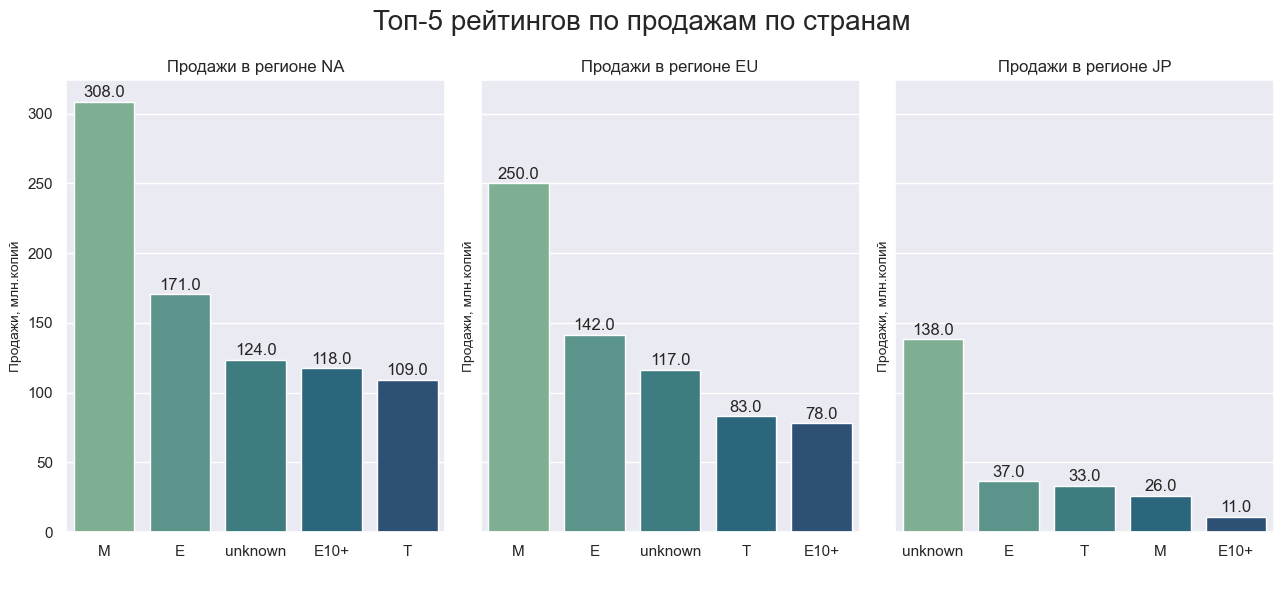

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6), sharey=True)
fig.suptitle('Топ-5 рейтингов по продажам по странам', fontsize=20)
#fig.autofmt_xdate(rotation=25)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    top = actual_period.pivot_table(index='rating', values=region, aggfunc='sum').reset_index().nlargest(5, region)
    sns.barplot(x = 'rating', y = region, data = top, palette = 'crest', ax=ax)
    rects = ax.patches
    labels = round(top[region])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom")
    ax.set_title(f'Продажи в регионе {region.upper()[:2]}', fontsize=12)
    ax.set_ylabel('Продажи, млн.копий', fontsize=10)
    ax.set_xlabel(' ')
plt.tight_layout()
plt.show()

- Продажи игр в Северной Америке и Европе по рейтингам идентичны. Лидируют игры с рейтингом M (Mature 17+), второе место отдается рейтингу E (Everyone 0+), что вероятно говорит о влиянии рейтингов на продажи, т.к. взрослые пользователи приобретают для себя игры с ограниченным рейтингом (для самых популярных жанров Action и Shooter, вероятно содержащих лексику, сцены с кровью и т.д.), а для детей игры без ограничений по контенту. 
- Третье место в рейтинге в Америке и Европе занимает рейтинг unknown, в наших данных это было пропущенное значение, вероятно производители игр не использовали систему ESRB для своих продуктов, так же в Европе есть свое рейтинговое агенство PEGI, а организация ESRB представлена на рынке США.
- В Японии рейтинги Е (Everyone 0+), Т (Teen 13+) и М (Mature 17+) показывают значительно меньшие продажи. На первом месте рейтинг unknown. Согласно информации из открытых источников возрастными рейтингами для консольных игр в Японии занимается CERO – некоммерческая организация, основанная в 2002 году (https://kanobu.ru/articles/stavlyu-na-cero-368311/). Вероятно поэтому игры с рейтингом unknown не рейтингованы агенством ESRB. 

In [77]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top = (actual_period
           .pivot_table(index='rating', values=[region, 'global_sales'], aggfunc='sum')
           .sort_values(by = region, ascending=False).reset_index())
    top['share_by_region'] = round(top[region]/top[region].sum()*100,1)
    top['global_share'] = round(top[region]/top['global_sales']*100,1)
    print(f'\n\033[1;34m Доля продаж игр по топ-5 рейтингам в регионе {region.upper()[:2]} \033[0m')
    display(top[['rating', 'share_by_region', 'global_share']].head())


 Доля продаж игр по топ-5 рейтингам в регионе NA 


,rating,share_by_region,global_share
0,M,37.2,46.3
1,E,20.6,43.8
2,unknown,14.9,30.0
3,E10+,14.2,51.0
4,T,13.2,43.0



 Доля продаж игр по топ-5 рейтингам в регионе EU 


,rating,share_by_region,global_share
0,M,37.4,37.5
1,E,21.2,36.3
2,unknown,17.4,28.3
3,T,12.4,32.7
4,E10+,11.7,33.8



 Доля продаж игр по топ-5 рейтингам в регионе JP 


,rating,share_by_region,global_share
0,unknown,56.3,33.5
1,E,14.9,9.4
2,T,13.6,13.1
3,M,10.6,3.9
4,E10+,4.6,4.9


- Доли продаж по рейтингам снова схожи между Северной Америкой и Европой, внутри регионов рейтинг М (mature 17+) занимает 37%, рейтинг E (Everyone 0+) - 21%, в глобальных продажах доли лидеров стабильны ~ 45% в Америке и ~ 37% в Европе. 
- В Японии рейтинг unknown лидирует с долей более 50% поэтому он и лидирует по продажам в регионе. На втором месте рейтинг Е (Everyone 0+) с долей внутреннего рынка 15%.

Попробуем рассмотреть связи между рейтингами ESRB и продажами игр.  
Для этого переведем рейтинги в числовые значения, уберем пропуски и рассчитаем корреляцию Спирмана.

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

rating_corr = actual_period.copy()
rating_corr = rating_corr.query('rating != "unknown"')

rating_corr['trans_rating'] = le.fit_transform(rating_corr['rating'])

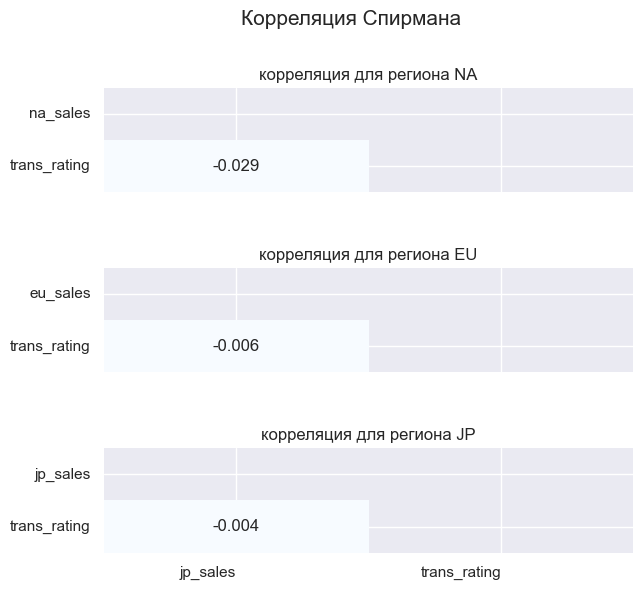

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
fig.suptitle('Корреляция Спирмана', fontsize=15)
fig.autofmt_xdate(rotation=0)
fig. tight_layout (h_pad= 4)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    mask = np.triu(rating_corr[rating_corr[region]!=0][[region, 'trans_rating']].corr(method='spearman'))
    (sns.heatmap(rating_corr[rating_corr[region]!=0][[region, 'trans_rating']].corr(method='spearman'), 
                 annot=True, cbar=False, cmap='Blues', mask = mask, fmt='.3f', ax=ax))
    ax.set_title(f'корреляция для региона {region.upper()[:2]}', fontsize=12)
plt.subplots_adjust(top = 0.85)
plt.show()

Согласно расчетам коэффициента корреляции Спирмана, связи между рейтингами, выставленными агенством ESRB, и продажами игр отсутствуют.

**Выводы**:  
- <ins>Портрет пользователя Северной Америки:</ins>
 - самые популярные игры для платформы X360, второе и третье место делять платформы PS3 и PS4. По доле продаж компания Microsoft крайне успешна на рынке видеоигр в Северной Америке: игры на платформе X360 занимают 60% глобальных продаж, а у XOne - 58.4%
 - жанровое предпочтение отдается Action, Shooter и Sports. 
 - самые продаваемые игры с рейтингами М (mature 17+) и (Everyone 0+) 
- <ins>Портрет пользователя Европы:</ins>
 - в лидерах продаж игры для платформы PS3, далее идут платформы PS4 и X360. Основные продажи видеоигр приходятся на игровые приставки компании Sony: PS3 - 37%, PS4 - 45% от мировых продаж, а игры для PC имеют долю почти 60 % от мировых продаж
 - среди жанров вкусы пользователей схожи с Северной Америкой, лидеры - Action, Shooter и Sports
 - среди рейтингов также лидируют игры для взрослых М (mature 17+) и для детской аудитории (Everyone 0+) 
- <ins>Портрет пользователя Японии:</ins> 
 - рынок Японии значительно отличается от Американского и Европейского, среди топ-5 платформ представлены исключительно Японские игровые приставки и консоли, первое место в продажах у 3DS. Доля игр для PSP занимает более 80% от глобальных продаж
 - самый популярный жанг видеоигр - Role-Playing, на его долю приходиться треть мировых продаж. Второе место занимает Action
 - среди рейтингов первое место занимает unknown, в данном случае есть два варианта, в наших данных это пропущенные значения, которые нам не удалось восполнить, либо, т.к. в Японии и Европе есть собственные рейтинговые организации (PEGI и CERO), выпускаемым играм не выставлялся рейтинг ESRB.
 
- Рынок Северной Америки лидирует по общему объему продаж видеоигр, далее следует Европа и Япония. 
- Можно предположить, что рейтинг, выставленный организацией ESRB, если и влияет на продажи, то не сильно. В большей степени на него будут опираться пользователи, приобретающие игры для детей, которым важно недопустить неподходящего контента.

## Шаг 4. Проверка гиротез

**Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**  

Сформулируем нулевую и альтернативную гипотезы:  

`H0` : средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
`H1` : средние пользовательские рейтинги платформ Xbox One и PC различаются

Для проверки данной гипотезы воспользуемся t-тестом (scipy.stats.ttest_ind()).  

Уровень статистической значимости примем равным **5%**.  

Создадим две выборки с рейтингами пользователей по необходимым платформам и избавимся от отсутствующих значений.

In [80]:
xbox = actual_period.query('platform == "XOne"').dropna(subset=['user_score'])
pc = actual_period.query('platform == "PC"').dropna(subset=['user_score'])

In [81]:
# посмотрим на количество записей в каждой выборке

print('Размер выборки для платформы \033[1;30mXbox One:\033[0m', len(xbox))
print('Размер выборки для платформы \033[1;30mPC:\033[0m', len(pc))

Размер выборки для платформы Xbox One: 182
Размер выборки для платформы PC: 307


Для проверки гипотез размеры выборок не должны сильно отличаться, в нашем же случае мы имеем весомое различие, при проведении теста воспользуемся параметром equal_var и установим False.  
Посмотрим на распределение значений на графике и выведем средние показатели по двум выборкам.

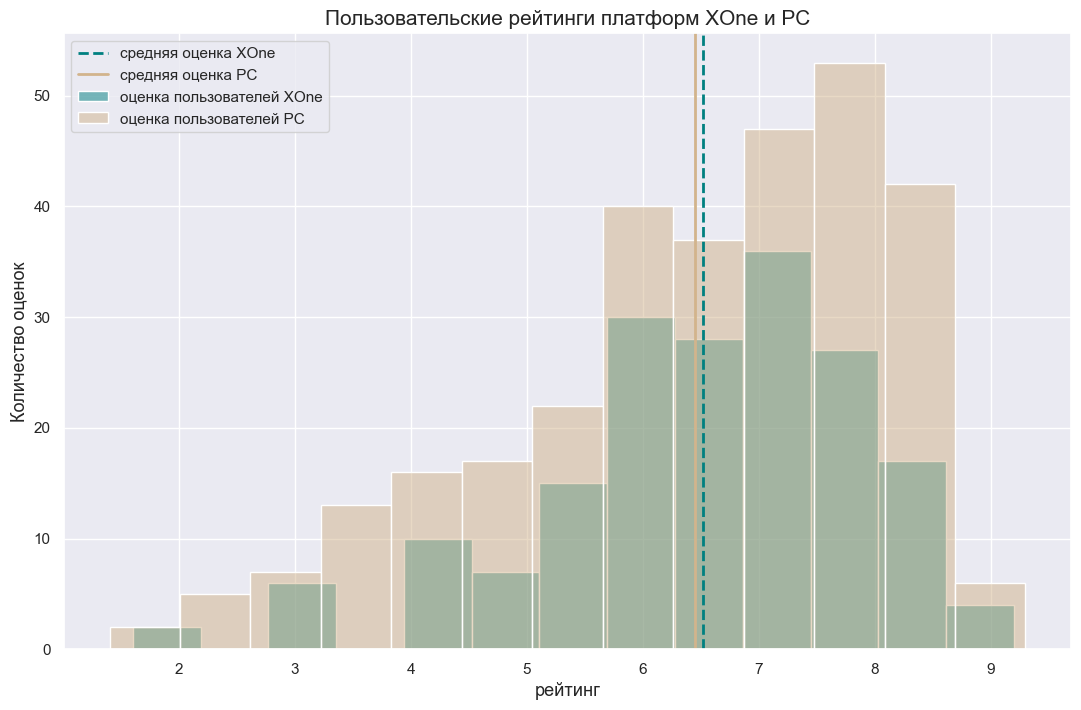

 средний рейтинг для платформы XOne: 6.52 балла      
 средний рейтинг для платформы PC: 6.45 балла


In [82]:
plt.figure(figsize=(13,8))
sns.histplot(data = xbox, x = 'user_score', color = 'teal',alpha = 0.5, label='оценка пользователей XOne')
sns.histplot(data = pc, x = 'user_score', color = 'tan',alpha = 0.5, label='оценка пользователей PC')
plt.axvline(xbox['user_score'].mean(), color = 'teal', ls='--', lw=2, label='средняя оценка XOne')
plt.axvline(pc['user_score'].mean(), color = 'tan', ls='-', lw=2, label='средняя оценка PC')
plt.title('Пользовательские рейтинги платформ XOne и PC',fontsize = 15)
plt.xlabel('рейтинг', fontsize = 13)
plt.ylabel('Количество оценок', fontsize = 13)
plt.legend()
plt.show()

print(f'\033[1;30m средний рейтинг для платформы XOne: \033[0m{round(xbox["user_score"].mean(),2)} балла\
      \n\033[1;30m средний рейтинг для платформы PC: \033[0m{round(pc["user_score"].mean(),2)} балла')

Распределения близки к нормальному, средние также находятся приблизительно на одном уровне. Проведем тест.

In [83]:
alpha = 0.05 

results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)

print(f'\033[1;30m p-value: \033[0m{results.pvalue}')

if results.pvalue < alpha:
    print('\n\033[1;31;47m Отвергаем нулевую гипотезу\033[0m')
else:
    print('\n\033[1;32;47m Нет оснований отвергнуть нулевую гипотезу\033[0m')

 p-value: 0.6130712247638477

 Нет оснований отвергнуть нулевую гипотезу


В данном случае значение p-value превышает уровень статистической значимости, поэтому оснований отвергать нулевую гипотезу (о равенстве cредних пользовательских рейтингов платформ Xbox One и PC) у нас нет. Первая гипотеза подтвердилась.

**Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.**  

Сформулируем нулевую и альтернативную гипотезы:  

`H0` : средние пользовательские рейтинги жанров Action и Sports одинаковые  
`H1` : средние пользовательские рейтинги жанров Action и Sports различаются

Для проверки данной гипотезы воспользуемся t-тестом (scipy.stats.ttest_ind()).  

Уровень статистической значимости примем равным **5%**.  

Создадим две выборки с рейтингами пользователей по необходимым жанрам и избавимся от отсутствующих значений.

In [84]:
action = actual_period.query('genre == "Action"').dropna(subset=['user_score'])
sports = actual_period.query('genre == "Sports"').dropna(subset=['user_score'])

In [85]:
# посмотрим на количество записей в каждой выборке

print('Размер выборки для жанра Action:', len(action))
print('Размер выборки для жанра Sports:', len(sports))

Размер выборки для жанра Action: 664
Размер выборки для жанра Sports: 245


И снова наши выборки сильно различаются, при проведении теста воспользуемся параметром equal_var и установим False.  
Посмотрим на распределение значений на графике и выведем средние показатели по двум выборкам.

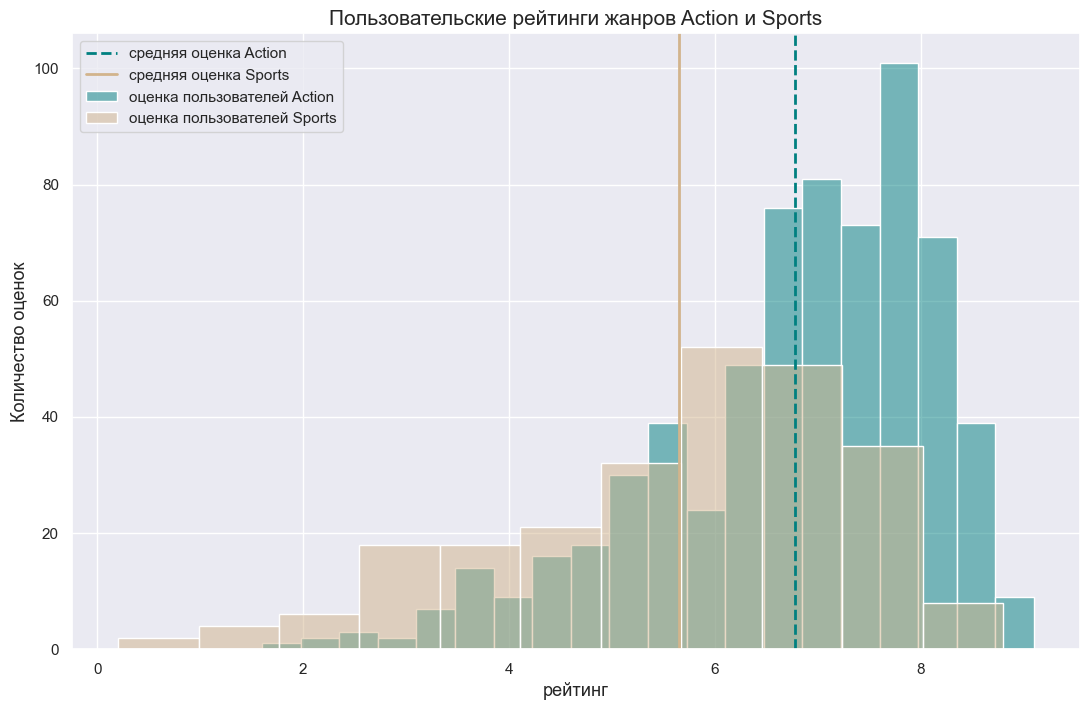

 средний рейтинг для жанра Action: 6.78 балла      
 средний рейтинг для жанра Sports: 5.65 балла


In [86]:
plt.figure(figsize=(13,8))
sns.histplot(data = action, x = 'user_score', color = 'teal',alpha = 0.5, label='оценка пользователей Action')
sns.histplot(data = sports, x = 'user_score', color = 'tan',alpha = 0.5, label='оценка пользователей Sports')
plt.axvline(action['user_score'].mean(), color = 'teal', ls='--', lw=2, label='средняя оценка Action')
plt.axvline(sports['user_score'].mean(), color = 'tan', ls='-', lw=2, label='средняя оценка Sports')
plt.title('Пользовательские рейтинги жанров Action и Sports',fontsize = 15)
plt.xlabel('рейтинг', fontsize = 13)
plt.ylabel('Количество оценок', fontsize = 13)
plt.legend()
plt.show()

print(f'\033[1;30m средний рейтинг для жанра Action: \033[0m{round(action["user_score"].mean(),2)} балла\
      \n\033[1;30m средний рейтинг для жанра Sports: \033[0m{round(sports["user_score"].mean(),2)} балла')

In [87]:
alpha = 0.05 

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print(f'\033[1;30m p-value: \033[0m{results.pvalue}')

if results.pvalue < alpha:
    print('\n\033[1;31;47m Отвергаем нулевую гипотезу\033[0m')
else:
    print('\n\033[1;32;47m Нет оснований отвергнуть нулевую гипотезу\033[0m')

 p-value: 1.1195647244704726e-18

 Отвергаем нулевую гипотезу


Мы получили очень маленькое значение p-value, которое говорит о том, что наблюдаемое равенство в нулевой гипотезе маловероятно и мы ее отвергаем в пользу альтернативной гипотезы. Таким образом средние пользовательские рейтинги жанров Action и Sports различаются. Вторая гипотеза подтвердилась.

**Выводы**:  
- <ins>Гипотеза первая о равенстве средних пользовательских рейтингов платформ Xbox One и PC:</ins>
 - установили пороговое значение alpha = 0.05, из-за различий в размерах выборок использовали параметр equal_var = False.
 - по результатам теста значение p-value превысило уровень статистической значимости, принимаем нулевую гипотезу о равенстве средних
 - Гипотеза первая подтвердилась
 - средний рейтинг для платформы XOne: 6.52 балла
 - средний рейтинг для платформы PC: 6.45 балла
- <ins>Гипотеза вторая о разности средних пользовательских рейтингов жанров Action и Sports:</ins>
 - установили пороговое значение alpha = 0.05, из-за различий в размерах выборок использовали параметр equal_var = False.
 - по результатам теста значение p-value оказалось ниже уровня стат.значимости, отвергаем нулевую гипотезу о равенстве средних
 - Гипотеза вторая подтвердилась
 - средний рейтинг для жанра Action: 6.78 балла  
 - средний рейтинг для жанра Sports: 5.65 балла

## Шаг 5. Выводы и рекомендации

- <ins>`Предобработка данных:`</ins>
 - выгрузили и рассмотрели имеющиеся данные, привели названия столбцов к нижнему регистру
 - рассмотрели уникальные значения в столбцах (аббревиатуру tbd в оценке пользователей заменили на nan, актуализировали рейтинги игр, а пропущенные значения рейтингов заменили на unknown)
 - удалили пропущенные значения в названиях игр и в столбце жанр (2 строки) и в столбце с годом релиза игры (269 строк)
 - привели столбцы к корректному типу данных, где это было необходимо и избавились от неявных дубликатов
 - добавили столбец с ссумарными продажами по странам и удалили из него строки с выбивающимися значениями
 - пропуски в столбцах с оценкой пользователей и критиков оставили без изменений.
- <ins>`Исследовательский анализ данных:`</ins>
 - <ins>Игры за весь представленный период:</ins>
   - Массово игры начали выпускаться с 1995 года (в наших данных период с 1980 по 2016 г). 2008 и 2009 года стали самыми успешными как по количеству выпущенных игр (1425 и 1426 соответственно) так и по мировым продажам (более 650 млн. копий), далее наблюдается спад вплоть до 2016 года.
   - Больше всего игр было выпущенно на платформах PS2 (лидирует и по продажам за весь период) и DS (2126 и 2121 соответственно). Пятерка лидеров по количеству выпущенных игр и по количеству проданных копий совпадает: PS2, PS3, DS, X360 и Wii.
   - "Срок жизни" платформы в среднем составляет 10-11 лет, "срок популярности" в районе 5-6ти лет.
 - <ins>Игры за актуальный период (2011-2016 гг.):</ins>
   - Платформа PS3 лидирует как по количеству выпущенных игр (707), так и по их продажам (446 млн.копий), далее второе место занимает платформа X360 (лидирует по медианному значению продаж). Третье и четвертое место у платформ PS4 и 3DS.
   - В динамике продаж по годам для всех платформ наблюдается снижение к 2016 году. Платформы PS4 и XOne являются потенциально прибыльными, вышедшие в релиз в 2013 году, их пик популярности как раз будет приходится на 2017-2018 года. Сюда также можно добавить платформы 3DS и X360, которые на протяжении всего актуального периода показывают неплохие результаты.
 - <ins>Отзывы пользователей и критиков:</ins>
   - Пользователи чаще оценивали игры в 7-8 баллов и только единицы получали 9 баллов и выше. Основная масса оценок критиков находится в диапазоне 70-80 и лишь немногие игры смогли получить оценку больше 90 баллов.
   - Оценки пользователей не влияют на продажи
   - Согласно коэффициенту корреляции Спирмана оценки критиков влияют на продажи игр (заметная корреляционную связь 0.5 - 0.6)
   - Больше всего успешных игр, по мнению критиков (оценка более 90 баллов), выпустила платформа PS3 (15 игр), X360  (10 игр) и замыкает тройку платформа РС - 9 игр в актуальном периоде.
 - <ins>Жанры игр:</ins>
   - Всего за актуальный период представлено 12 различных жанров. Больше всего было выпущенно игр в жанре Action (1269 игр), он же лидирует и по количеству проданных копий (558 миллионов). На втором месте по продажам (403 млн.копий) жанр Shooter (занимающий 6-е место по количеству выпущенных игр и лидирующий по медианным продажам), что явно говорит о популярности игр в данном жанре. Третье и четвертое место, приблизительно с равными продажами, занимают жанры Role-Playing  и Sports (~ 240 млн.копий). Самые низкие продажи у жанров Strategy (22 млн.копий) и Puzzle (10 млн.копий)
   - Среди игр самая продаваемая игра GTA V в жанре Action, за актуальный период было продано 56.58 млн.копий. Следом в жанре Shooter идет игра Call of Duty сразу в 4х раличных обновлениях, среди них больше всего было продано копий Call of Duty: Modern Warfare 3 (30.6 миллионов). В жанре Misc самая популярная игра Minecraft (24.16 млн.копий), у жанра Role-Playing фаворит The Elder Scrolls V: Skyrim (21.14 млн.копий) и в жанре спорт лидирует игра FIFA 15 (17.37 млн. копий).
- <ins>`Портрет пользователя для каждого региона:`</ins>
 - Рынок Северной Америки лидирует по общему объему продаж видеоигр, далее следует Европа и Япония.
 - <ins>Портрет пользователя Северной Америки:</ins>
   - самые популярные игры для платформы X360, второе и третье место делять платформы PS3 и PS4. По доле продаж компания Microsoft крайне успешна на рынке видеоигр в Северной Америке: игры на платформе X360 занимают 60% глобальных продаж, а у XOne - 58.4%
   - жанровое предпочтение отдается Action, Shooter и Sports. Самые продаваемые игры с рейтингами М (mature 17+) и (Everyone 0+) 
 - <ins>Портрет пользователя Европы:</ins>
   - в лидерах продаж игры для платформы PS3, далее идут платформы PS4 и X360. Основные продажи видеоигр приходятся на игровые приставки компании Sony: PS3 - 37%, PS4 - 45% от мировых продаж, а игры для PC имеют долю почти 60 % от мировых продаж
   - среди жанров вкусы пользователей схожи с Северной Америкой, лидеры - Action, Shooter и Sports, среди рейтингов также лидируют игры для взрослых М (mature 17+) и для детской аудитории (Everyone 0+)
 - <ins>Портрет пользователя Японии:</ins>
   - рынок Японии значительно отличается от Американского и Европейского, среди топ-5 платформ представлены исключительно Японские игровые приставки и консоли, первое место в продажах у 3DS. Доля игр для PSP занимает более 80% от глобальных продаж
   - самый популярный жанг видеоигр - Role-Playing, на его долю приходиться треть мировых продаж, второе место занимает Action. Среди рейтингов первое место занимает unknown, в данном случае есть два варианта, в наших данных это пропущенные значения, которые нам не удалось восполнить, либо, т.к. в Японии и Европе есть собственные рейтинговые организации (PEGI и CERO), выпускаемым играм не выставлялся рейтинг ESRB.
 - Можно предположить, что рейтинг, выставленный организацией ESRB, если и влияет на продажи, то несильно. В большей степени на него будут опираться пользователи, приобретающие игры для детей, которым важно недопустить неподходящего контента.
- <ins>`Проверка гипотез:`</ins>
 - Гипотеза первая о равенстве средних пользовательских рейтингов платформ Xbox One и PC подтвердилась.
   - средний рейтинг для платформы XOne: 6.52 балла
   - средний рейтинг для платформы PC: 6.45 балла
 - Гипотеза вторая о разности средних пользовательских рейтингов жанров Action и Sports подтвердилась.
   - средний рейтинг для жанра Action: 6.78 балла 
   - средний рейтинг для жанра Sports: 5.65 балла
- <ins>`Рекомендации:`</ins>  
Для планирования рекламных компаний на 2017 год мы бы рекомендовали опираться на предпочтения рынка и разделить рекламные кампании по регионам:
    - для рынка Северной Америки уделить внимания продуктам компании Microsoft, играм в жанрах Action и Shooter
    - для рынка Европы сделать упор на продукцию Sony, предпочтительные жанры также Action и Shooter
    - пользователи рынка Японии предпочитают портативные консоли, больше всего популярны игры для 3DS и PSP. Самый популярный жанр игр Role-Playing